# JanataHack Mobility Analytics
Welcome to Sigma Cab Private Limited - a cab aggregator service. Their customers can download 
their app on smartphones and book a cab from any where in the cities they operate in. They, in 
turn search for cabs from various service providers and provide the best option to their client
across available options. They have been in operation for little less than a year now. During 
this period, they have captured surge_pricing_type from the service providers. You have been 
hired by Sigma Cabs as a Data Scientist and have been asked to build a predictive model, which 
could help them in predicting the surge_pricing_type pro-actively. This would in turn help them
in matching the right cabs with the right customers quickly and efficiently.

# Data Dictionary
Variable Definition

Trip_ID :
ID for TRIP (Can not be used for purposes of modelling)
Trip_Distance :
The distance for the trip requested by the customer
Type_of_Cab :
Category of the cab requested by the customer
Customer_Since_Months :
Customer using cab services since n months; 0 month means current month
Life_Style_Index :
Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
Confidence_Life_Style_Index :
Category showing confidence on the index mentioned above
Destination_Type :
Sigma Cabs divides any destination in one of the 14 categories.
Customer_Rating :
Average of life time ratings of the customer till date
Cancellation_Last_1Month :
Number of trips cancelled by the customer in last 1 month
Var1, Var2 and Var3 :
Continuous variables masked by the company. Can be used for modelling purposes
Gender :
Gender of the customer
Surge_Pricing_Type :
Predictor variable can be of 3 types

sample_submission.csv

Column Name	Description
Trip_ID :
ID for TRIP (Can not be used for purposes of modelling)
Surge_Pricing_Type :
Predicted type for dynamic pricing

# Evaluation Metric
The evaluation metric for this competition is Accuracy Score.

In [62]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import lightgbm as ltb
from sklearn.metrics import accuracy_score as ac
from sklearn.preprocessing import MinMaxScaler,StandardScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data files
Train = pd.read_csv('train_Wc8LBpr.csv')
Test  = pd.read_csv('test_VsU9xXK.csv')
Sub   = pd.read_csv('sample_submission_NoPBkjr.csv')

In [3]:
Train.shape,Test.shape,Sub.shape

((131662, 14), (87395, 13), (87395, 2))

In [4]:
#explore Training dataset 
Train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [5]:
Test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [6]:
Train.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [7]:
Test.dtypes

Trip_ID                         object
Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
dtype: object

In [8]:
Train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [9]:
Test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [10]:
Train['Type_of_Cab'].value_counts()

B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [11]:
Test['Type_of_Cab'].value_counts()

B    20449
C    18610
A    14309
D    12894
E     7975
Name: Type_of_Cab, dtype: int64

In [12]:
Train['Customer_Since_Months'].value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [13]:
Test['Customer_Since_Months'].value_counts()

10.0    28137
2.0      7824
3.0      6723
0.0      6716
5.0      5764
1.0      5668
4.0      5309
7.0      4925
6.0      4904
8.0      4197
9.0      3262
Name: Customer_Since_Months, dtype: int64

In [14]:
Train['Life_Style_Index'].value_counts()

2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
2.78127    12
2.78388    12
2.77256    12
3.00108    11
2.87794    11
2.77571    11
2.77576    11
2.78440    11
2.78502    11
2.69999    11
2.78022    11
2.70370    11
2.77212    11
2.99666    11
2.70544    11
2.77115    11
2.77533    11
2.78380    11
2.77651    11
2.90294    11
2.80728    11
2.69191    10
2.77696    10
2.78450    10
2.69767    10
           ..
2.75879     1
2.78152     1
2.91007     1
3.14645     1
3.12645     1
3.15879     1
3.49317     1
2.61090     1
3.20414     1
2.57961     1
2.02440     1
2.57664     1
2.84798     1
2.58297     1
3.19028     1
2.92332     1
2.40064     1
2.84993     1
2.46916     1
3.08925     1
3.14874     1
2.62139     1
3.29492     1
3.33279     1
2.51911     1
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64

In [15]:
Test['Life_Style_Index'].value_counts()

2.77677    10
2.77137    10
2.77514    10
2.81029     9
2.78512     9
2.81778     9
2.78315     9
2.77485     9
2.95315     9
2.69880     8
2.77957     8
2.78019     8
2.78053     8
2.78300     8
2.84559     8
2.87738     8
2.77838     8
2.77283     8
2.78249     8
2.80793     8
2.77273     8
2.84414     8
2.89944     8
2.87507     8
2.80907     8
2.81799     8
2.78132     8
2.77482     8
2.74525     8
2.81762     8
           ..
2.79016     1
2.91827     1
2.72411     1
2.40223     1
2.97941     1
2.99189     1
2.89219     1
2.98453     1
2.75325     1
2.54501     1
2.47664     1
2.86960     1
3.01816     1
3.11555     1
3.22206     1
3.08179     1
2.67446     1
2.39924     1
2.72661     1
2.72156     1
2.89631     1
3.29922     1
3.07820     1
2.65792     1
3.13419     1
3.09382     1
2.62738     1
2.53647     1
2.83061     1
2.48837     1
Name: Life_Style_Index, Length: 44857, dtype: int64

In [16]:
Train['Confidence_Life_Style_Index'].value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [17]:
Test['Confidence_Life_Style_Index'].value_counts()

B    26910
C    23769
A    23389
Name: Confidence_Life_Style_Index, dtype: int64

In [18]:
Train['Var1'].value_counts()

39.0     1259
42.0     1221
38.0     1208
43.0     1190
37.0     1180
40.0     1163
36.0     1123
48.0     1123
45.0     1107
44.0     1087
50.0     1084
46.0     1073
49.0     1064
41.0     1063
47.0     1016
52.0      985
51.0      981
57.0      967
54.0      963
59.0      957
58.0      956
56.0      944
55.0      936
63.0      936
53.0      935
60.0      891
61.0      878
66.0      878
35.0      874
72.0      865
         ... 
165.0       2
129.0       2
117.0       2
135.0       1
159.0       1
133.0       1
132.0       1
146.0       1
131.0       1
160.0       1
141.0       1
179.0       1
171.0       1
119.0       1
161.0       1
163.0       1
169.0       1
148.0       1
136.0       1
149.0       1
173.0       1
122.0       1
120.0       1
154.0       1
128.0       1
210.0       1
200.0       1
139.0       1
144.0       1
156.0       1
Name: Var1, Length: 122, dtype: int64

In [19]:
Test['Var1'].value_counts()

44.0     836
39.0     814
40.0     806
43.0     801
45.0     795
36.0     764
38.0     764
42.0     755
47.0     754
41.0     753
49.0     746
37.0     744
48.0     720
46.0     710
51.0     694
50.0     688
57.0     680
53.0     658
56.0     649
55.0     644
65.0     638
52.0     635
61.0     626
35.0     617
58.0     615
54.0     612
63.0     607
64.0     606
60.0     588
62.0     579
        ... 
109.0    263
102.0    262
108.0    250
104.0    247
110.0    245
111.0    226
30.0     168
112.0     99
113.0     15
120.0      5
126.0      4
118.0      4
122.0      4
121.0      4
114.0      4
115.0      3
123.0      2
152.0      2
117.0      2
116.0      2
157.0      1
125.0      1
161.0      1
151.0      1
137.0      1
178.0      1
131.0      1
140.0      1
124.0      1
165.0      1
Name: Var1, Length: 105, dtype: int64

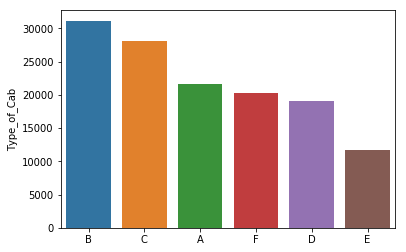

In [20]:
#missing value imputation
Train['Type_of_Cab'] = Train['Type_of_Cab'].fillna('F')
sns.barplot(x= Train['Type_of_Cab'].value_counts().index,y= Train['Type_of_Cab'].value_counts())

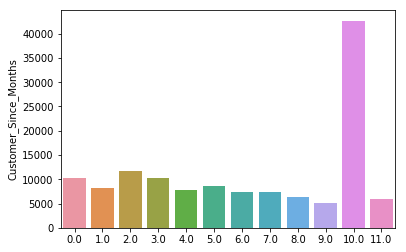

In [21]:
Train['Customer_Since_Months'] = Train['Customer_Since_Months'].fillna(11.0)
sns.barplot(x= Train['Customer_Since_Months'].value_counts().index,y= Train['Customer_Since_Months'].value_counts())

In [22]:
Train['Life_Style_Index'] = Train['Life_Style_Index'].fillna(Train['Life_Style_Index'].mean())

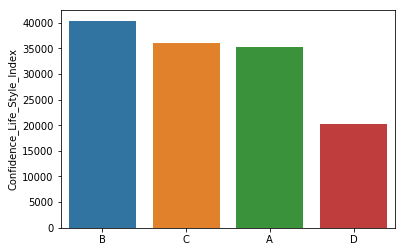

In [23]:
Train['Confidence_Life_Style_Index'] = Train['Confidence_Life_Style_Index'].fillna('D')
sns.barplot(x= Train['Confidence_Life_Style_Index'].value_counts().index,y= Train['Confidence_Life_Style_Index'].value_counts())

In [24]:
Train['Var1'] = Train['Var1'].fillna(round(Train['Var1'].mean()))

In [25]:
#missing value imputation
Test['Type_of_Cab'] = Test['Type_of_Cab'].fillna('F')
Test['Customer_Since_Months'] = Test['Customer_Since_Months'].fillna(11.0)
Test['Life_Style_Index'] = Test['Life_Style_Index'].fillna(Test['Life_Style_Index'].mean())
Test['Confidence_Life_Style_Index'] = Test['Confidence_Life_Style_Index'].fillna('D')
Test['Var1'] = Train['Var1'].fillna(round(Test['Var1'].mean()))

In [26]:
Train.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [27]:
Test.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
dtype: int64

In [28]:
Train['Surge_Pricing_Type'].value_counts('Normalize')

2    0.430861
3    0.362443
1    0.206696
Name: Surge_Pricing_Type, dtype: float64

In [29]:
# one hot encoding of categorical variables
Train.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type'],
      dtype='object')

In [30]:
Test.columns

Index(['Trip_ID', 'Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender'],
      dtype='object')

In [31]:
Train_df = Train[['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender', 'Surge_Pricing_Type']]

In [32]:
Test_df = Test[['Trip_Distance', 'Type_of_Cab', 'Customer_Since_Months',
       'Life_Style_Index', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Gender']]

In [33]:
Train_df = pd.get_dummies(Train_df)
Train_df.shape

(131662, 35)

In [34]:
Test_df = pd.get_dummies(Test_df)
Test_df.shape

(87395, 34)

In [35]:
Train_df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_A,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,6.77,1.0,2.427690,3.90500,0,40.0,46,60,2,0,...,0,0,0,0,0,0,0,0,1,0
1,29.47,10.0,2.782450,3.45000,0,38.0,56,78,2,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.802064,3.50125,2,64.0,56,77,2,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.802064,3.45375,0,64.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.034530,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
Test_df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_A,Type_of_Cab_B,...,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Female,Gender_Male
0,9.44,10.0,2.57438,3.68000,2,40.0,46,63,1,0,...,0,0,0,0,0,0,0,0,0,1
1,32.15,10.0,2.85143,1.59375,0,38.0,49,80,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10.38,4.0,2.70530,4.50500,0,64.0,47,74,0,0,...,0,0,0,0,0,0,0,0,0,1
3,14.94,6.0,2.48159,4.53000,0,64.0,43,54,0,0,...,0,0,0,0,0,0,0,0,0,1
4,32.03,7.0,2.81598,4.60125,3,51.0,44,56,0,1,...,0,0,0,0,1,0,0,0,0,1


In [37]:
Train_df.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Surge_Pricing_Type', 'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C',
       'Type_of_Cab_D', 'Type_of_Cab_E', 'Type_of_Cab_F',
       'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Confidence_Life_Style_Index_D',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [38]:
Test_df.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Type_of_Cab_F', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Confidence_Life_Style_Index_D', 'Destination_Type_A',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [39]:
X = Train_df[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C',
       'Type_of_Cab_D', 'Type_of_Cab_E', 'Type_of_Cab_F',
       'Confidence_Life_Style_Index_A', 'Confidence_Life_Style_Index_B',
       'Confidence_Life_Style_Index_C', 'Confidence_Life_Style_Index_D',
       'Destination_Type_A', 'Destination_Type_B', 'Destination_Type_C',
       'Destination_Type_D', 'Destination_Type_E', 'Destination_Type_F',
       'Destination_Type_G', 'Destination_Type_H', 'Destination_Type_I',
       'Destination_Type_J', 'Destination_Type_K', 'Destination_Type_L',
       'Destination_Type_M', 'Destination_Type_N', 'Gender_Female',
       'Gender_Male']].values

y = Train_df['Surge_Pricing_Type'].values

In [40]:
Xtst = Test_df[['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
       'Type_of_Cab_A', 'Type_of_Cab_B', 'Type_of_Cab_C', 'Type_of_Cab_D',
       'Type_of_Cab_E', 'Type_of_Cab_F', 'Confidence_Life_Style_Index_A',
       'Confidence_Life_Style_Index_B', 'Confidence_Life_Style_Index_C',
       'Confidence_Life_Style_Index_D', 'Destination_Type_A',
       'Destination_Type_B', 'Destination_Type_C', 'Destination_Type_D',
       'Destination_Type_E', 'Destination_Type_F', 'Destination_Type_G',
       'Destination_Type_H', 'Destination_Type_I', 'Destination_Type_J',
       'Destination_Type_K', 'Destination_Type_L', 'Destination_Type_M',
       'Destination_Type_N', 'Gender_Female', 'Gender_Male']].values

In [41]:
X

array([[ 6.77    ,  1.      ,  2.42769 , ...,  0.      ,  1.      ,
         0.      ],
       [29.47    , 10.      ,  2.78245 , ...,  0.      ,  0.      ,
         1.      ],
       [41.58    , 10.      ,  2.802064, ...,  0.      ,  0.      ,
         1.      ],
       ...,
       [40.17    , 10.      ,  2.99565 , ...,  0.      ,  1.      ,
         0.      ],
       [46.88    ,  4.      ,  3.04744 , ...,  0.      ,  0.      ,
         1.      ],
       [31.96    ,  7.      ,  2.93773 , ...,  0.      ,  0.      ,
         1.      ]])

In [42]:
Xtst

array([[ 9.44      , 10.        ,  2.57438   , ...,  0.        ,
         0.        ,  1.        ],
       [32.15      , 10.        ,  2.85143   , ...,  0.        ,
         1.        ,  0.        ],
       [10.38      ,  4.        ,  2.7053    , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [37.86      ,  6.        ,  3.08227   , ...,  0.        ,
         0.        ,  1.        ],
       [10.63      ,  1.        ,  2.80339186, ...,  0.        ,
         0.        ,  1.        ],
       [37.96      , 10.        ,  3.00274   , ...,  0.        ,
         1.        ,  0.        ]])

In [43]:
y

array([2, 2, 2, ..., 2, 2, 1], dtype=int64)

In [91]:
# Scale the data for PCA using Standard Scaler
Xsc    =  StandardScaler().fit_transform(X)
Xsctst = StandardScaler().fit_transform(Xtst)

In [92]:
# train test split for PCA
X_train,X_val,y_train,y_val = train_test_split(Xsc,y,test_size = 0.30,shuffle = True,random_state= 11,stratify=y)

In [46]:
COMP = np.linspace(.80,.99,5)
COMP

array([0.8   , 0.8475, 0.895 , 0.9425, 0.99  ])

In [47]:
def lrpca(clf,X_train,X_val) :
    nc_score = {}
    
    for comp in COMP :
        pca = PCA(comp)
        pca.fit(X_train)
        train_pca = pca.transform(X_train)
        val_pca   = pca.transform(X_val)
        _,acc1 = testforclassifiers(eval(clf),train_pca,y_train,val_pca,0,0)
        nc_score[pca.n_components_]  = [comp,acc1]
        
    cldf = pd.DataFrame.from_dict(nc_score,orient='index')
    cldf.columns = ['Comp_Percent','Score']
    
    sns.lineplot(cldf.index,cldf.Score)
    return cldf 

In [48]:
def lrpcap(clf,X_train,X_val,percent) :
      
    pca = PCA(percent)
    pca.fit(X_train)
    train_pca = pca.transform(X_train)
    val_pca   = pca.transform(X_val)
    _,acc1 = testforclassifiers(eval(clf),train_pca,y_train,val_pca,0,0)
    print(acc1)   
    

,Comp_Percent,Score
22,0.8000,0.685258
23,0.8475,0.686625
25,0.8950,0.685435
27,0.9425,0.685359
29,0.9900,0.689916


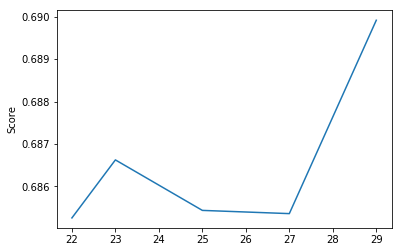

In [50]:
lrpca('LogisticRegression()',X_train,X_val) 

In [94]:
lrpcap('ltb.LGBMClassifier()',X_train,X_val,.99) 

0.6980176713334515


In [53]:
lrpcap('RandomForestClassifier(n_estimators= 500,max_depth = 5)',X_train,X_val,.99) 

0.6763715537102205


In [54]:
lrpcap('CatBoostClassifier()',X_train,X_val,.99) 

Learning rate set to 0.071089
0:	learn: 0.6393011	total: 207ms	remaining: 3m 26s
1:	learn: 0.5935893	total: 267ms	remaining: 2m 13s
2:	learn: 0.5561086	total: 327ms	remaining: 1m 48s
3:	learn: 0.5278870	total: 415ms	remaining: 1m 43s
4:	learn: 0.5031983	total: 471ms	remaining: 1m 33s
5:	learn: 0.4824107	total: 527ms	remaining: 1m 27s
6:	learn: 0.4631718	total: 591ms	remaining: 1m 23s
7:	learn: 0.4474920	total: 651ms	remaining: 1m 20s
8:	learn: 0.4338917	total: 707ms	remaining: 1m 17s
9:	learn: 0.4226979	total: 767ms	remaining: 1m 15s
10:	learn: 0.4125943	total: 831ms	remaining: 1m 14s
11:	learn: 0.4048322	total: 898ms	remaining: 1m 13s
12:	learn: 0.3978030	total: 957ms	remaining: 1m 12s
13:	learn: 0.3922033	total: 1.01s	remaining: 1m 11s
14:	learn: 0.3868449	total: 1.08s	remaining: 1m 10s
15:	learn: 0.3821502	total: 1.15s	remaining: 1m 10s
16:	learn: 0.3781295	total: 1.2s	remaining: 1m 9s
17:	learn: 0.3743209	total: 1.26s	remaining: 1m 8s
18:	learn: 0.3709770	total: 1.32s	remaining: 1m

161:	learn: 0.3246931	total: 10.7s	remaining: 55.1s
162:	learn: 0.3246279	total: 10.7s	remaining: 55s
163:	learn: 0.3245356	total: 10.8s	remaining: 54.9s
164:	learn: 0.3244620	total: 10.9s	remaining: 54.9s
165:	learn: 0.3243872	total: 10.9s	remaining: 54.9s
166:	learn: 0.3243058	total: 11s	remaining: 54.9s
167:	learn: 0.3242256	total: 11.1s	remaining: 54.8s
168:	learn: 0.3241166	total: 11.1s	remaining: 54.7s
169:	learn: 0.3240227	total: 11.2s	remaining: 54.6s
170:	learn: 0.3239644	total: 11.3s	remaining: 54.6s
171:	learn: 0.3238623	total: 11.3s	remaining: 54.4s
172:	learn: 0.3237840	total: 11.4s	remaining: 54.4s
173:	learn: 0.3236945	total: 11.4s	remaining: 54.3s
174:	learn: 0.3236003	total: 11.5s	remaining: 54.2s
175:	learn: 0.3235405	total: 11.6s	remaining: 54.1s
176:	learn: 0.3234534	total: 11.6s	remaining: 54s
177:	learn: 0.3233910	total: 11.7s	remaining: 53.9s
178:	learn: 0.3233140	total: 11.7s	remaining: 53.8s
179:	learn: 0.3232447	total: 11.8s	remaining: 53.8s
180:	learn: 0.3231

322:	learn: 0.3122539	total: 21s	remaining: 44.1s
323:	learn: 0.3121822	total: 21.1s	remaining: 44s
324:	learn: 0.3121080	total: 21.1s	remaining: 43.9s
325:	learn: 0.3120252	total: 21.2s	remaining: 43.9s
326:	learn: 0.3119498	total: 21.3s	remaining: 43.8s
327:	learn: 0.3118784	total: 21.3s	remaining: 43.7s
328:	learn: 0.3118122	total: 21.4s	remaining: 43.6s
329:	learn: 0.3117701	total: 21.5s	remaining: 43.6s
330:	learn: 0.3116969	total: 21.5s	remaining: 43.5s
331:	learn: 0.3116279	total: 21.6s	remaining: 43.4s
332:	learn: 0.3115438	total: 21.7s	remaining: 43.4s
333:	learn: 0.3114687	total: 21.7s	remaining: 43.3s
334:	learn: 0.3113958	total: 21.8s	remaining: 43.2s
335:	learn: 0.3113367	total: 21.8s	remaining: 43.2s
336:	learn: 0.3112584	total: 21.9s	remaining: 43.1s
337:	learn: 0.3112051	total: 22s	remaining: 43s
338:	learn: 0.3111337	total: 22s	remaining: 42.9s
339:	learn: 0.3110748	total: 22.1s	remaining: 42.9s
340:	learn: 0.3110152	total: 22.1s	remaining: 42.8s
341:	learn: 0.3109518	

483:	learn: 0.3025012	total: 31.2s	remaining: 33.3s
484:	learn: 0.3024531	total: 31.3s	remaining: 33.2s
485:	learn: 0.3023985	total: 31.4s	remaining: 33.2s
486:	learn: 0.3023142	total: 31.4s	remaining: 33.1s
487:	learn: 0.3022495	total: 31.5s	remaining: 33s
488:	learn: 0.3021929	total: 31.6s	remaining: 33s
489:	learn: 0.3021355	total: 31.6s	remaining: 32.9s
490:	learn: 0.3020760	total: 31.7s	remaining: 32.8s
491:	learn: 0.3020259	total: 31.8s	remaining: 32.8s
492:	learn: 0.3019806	total: 31.8s	remaining: 32.7s
493:	learn: 0.3019264	total: 31.9s	remaining: 32.7s
494:	learn: 0.3018714	total: 31.9s	remaining: 32.6s
495:	learn: 0.3018308	total: 32s	remaining: 32.5s
496:	learn: 0.3017884	total: 32.1s	remaining: 32.5s
497:	learn: 0.3017151	total: 32.1s	remaining: 32.4s
498:	learn: 0.3016674	total: 32.2s	remaining: 32.3s
499:	learn: 0.3016020	total: 32.3s	remaining: 32.3s
500:	learn: 0.3015426	total: 32.3s	remaining: 32.2s
501:	learn: 0.3014992	total: 32.4s	remaining: 32.1s
502:	learn: 0.3014

642:	learn: 0.2939961	total: 41.4s	remaining: 23s
643:	learn: 0.2939450	total: 41.5s	remaining: 22.9s
644:	learn: 0.2938874	total: 41.5s	remaining: 22.9s
645:	learn: 0.2938369	total: 41.6s	remaining: 22.8s
646:	learn: 0.2937991	total: 41.6s	remaining: 22.7s
647:	learn: 0.2937564	total: 41.7s	remaining: 22.7s
648:	learn: 0.2937081	total: 41.8s	remaining: 22.6s
649:	learn: 0.2936659	total: 41.8s	remaining: 22.5s
650:	learn: 0.2936254	total: 41.9s	remaining: 22.5s
651:	learn: 0.2935749	total: 42s	remaining: 22.4s
652:	learn: 0.2934995	total: 42s	remaining: 22.3s
653:	learn: 0.2934518	total: 42.1s	remaining: 22.3s
654:	learn: 0.2933987	total: 42.2s	remaining: 22.2s
655:	learn: 0.2933477	total: 42.2s	remaining: 22.1s
656:	learn: 0.2933045	total: 42.3s	remaining: 22.1s
657:	learn: 0.2932488	total: 42.4s	remaining: 22s
658:	learn: 0.2932139	total: 42.4s	remaining: 21.9s
659:	learn: 0.2931623	total: 42.5s	remaining: 21.9s
660:	learn: 0.2931089	total: 42.5s	remaining: 21.8s
661:	learn: 0.293058

801:	learn: 0.2861514	total: 51.5s	remaining: 12.7s
802:	learn: 0.2860941	total: 51.5s	remaining: 12.6s
803:	learn: 0.2860620	total: 51.6s	remaining: 12.6s
804:	learn: 0.2860313	total: 51.7s	remaining: 12.5s
805:	learn: 0.2860002	total: 51.7s	remaining: 12.4s
806:	learn: 0.2859460	total: 51.8s	remaining: 12.4s
807:	learn: 0.2859099	total: 51.8s	remaining: 12.3s
808:	learn: 0.2858579	total: 51.9s	remaining: 12.3s
809:	learn: 0.2858215	total: 52s	remaining: 12.2s
810:	learn: 0.2857831	total: 52s	remaining: 12.1s
811:	learn: 0.2857429	total: 52.1s	remaining: 12.1s
812:	learn: 0.2857052	total: 52.2s	remaining: 12s
813:	learn: 0.2856414	total: 52.2s	remaining: 11.9s
814:	learn: 0.2856015	total: 52.3s	remaining: 11.9s
815:	learn: 0.2855512	total: 52.4s	remaining: 11.8s
816:	learn: 0.2855114	total: 52.4s	remaining: 11.7s
817:	learn: 0.2854556	total: 52.5s	remaining: 11.7s
818:	learn: 0.2854040	total: 52.6s	remaining: 11.6s
819:	learn: 0.2853534	total: 52.6s	remaining: 11.5s
820:	learn: 0.2852

961:	learn: 0.2787437	total: 1m 1s	remaining: 2.43s
962:	learn: 0.2787026	total: 1m 1s	remaining: 2.37s
963:	learn: 0.2786464	total: 1m 1s	remaining: 2.3s
964:	learn: 0.2786047	total: 1m 1s	remaining: 2.24s
965:	learn: 0.2785472	total: 1m 1s	remaining: 2.18s
966:	learn: 0.2784955	total: 1m 1s	remaining: 2.11s
967:	learn: 0.2784496	total: 1m 1s	remaining: 2.05s
968:	learn: 0.2784036	total: 1m 2s	remaining: 1.98s
969:	learn: 0.2783438	total: 1m 2s	remaining: 1.92s
970:	learn: 0.2782881	total: 1m 2s	remaining: 1.86s
971:	learn: 0.2782529	total: 1m 2s	remaining: 1.79s
972:	learn: 0.2782046	total: 1m 2s	remaining: 1.73s
973:	learn: 0.2781708	total: 1m 2s	remaining: 1.66s
974:	learn: 0.2781327	total: 1m 2s	remaining: 1.6s
975:	learn: 0.2780783	total: 1m 2s	remaining: 1.54s
976:	learn: 0.2780593	total: 1m 2s	remaining: 1.47s
977:	learn: 0.2780247	total: 1m 2s	remaining: 1.41s
978:	learn: 0.2779878	total: 1m 2s	remaining: 1.34s
979:	learn: 0.2779575	total: 1m 2s	remaining: 1.28s
980:	learn: 0.

123:	learn: 0.5117600	total: 7.88s	remaining: 55.7s
124:	learn: 0.5116849	total: 7.95s	remaining: 55.7s
125:	learn: 0.5115924	total: 8.01s	remaining: 55.6s
126:	learn: 0.5115102	total: 8.07s	remaining: 55.5s
127:	learn: 0.5114012	total: 8.14s	remaining: 55.4s
128:	learn: 0.5113120	total: 8.2s	remaining: 55.4s
129:	learn: 0.5111964	total: 8.26s	remaining: 55.3s
130:	learn: 0.5111156	total: 8.33s	remaining: 55.2s
131:	learn: 0.5110193	total: 8.39s	remaining: 55.2s
132:	learn: 0.5109540	total: 8.45s	remaining: 55.1s
133:	learn: 0.5108676	total: 8.52s	remaining: 55.1s
134:	learn: 0.5107750	total: 8.58s	remaining: 55s
135:	learn: 0.5107104	total: 8.64s	remaining: 54.9s
136:	learn: 0.5106385	total: 8.71s	remaining: 54.8s
137:	learn: 0.5105573	total: 8.77s	remaining: 54.8s
138:	learn: 0.5104895	total: 8.82s	remaining: 54.7s
139:	learn: 0.5104186	total: 8.88s	remaining: 54.6s
140:	learn: 0.5103304	total: 8.94s	remaining: 54.5s
141:	learn: 0.5102405	total: 9s	remaining: 54.4s
142:	learn: 0.5101

283:	learn: 0.4980546	total: 18s	remaining: 45.5s
284:	learn: 0.4979732	total: 18.1s	remaining: 45.4s
285:	learn: 0.4979124	total: 18.2s	remaining: 45.3s
286:	learn: 0.4978496	total: 18.2s	remaining: 45.3s
287:	learn: 0.4977761	total: 18.3s	remaining: 45.2s
288:	learn: 0.4977154	total: 18.3s	remaining: 45.1s
289:	learn: 0.4976436	total: 18.4s	remaining: 45.1s
290:	learn: 0.4975852	total: 18.5s	remaining: 45s
291:	learn: 0.4975172	total: 18.5s	remaining: 44.9s
292:	learn: 0.4974496	total: 18.6s	remaining: 44.9s
293:	learn: 0.4973754	total: 18.7s	remaining: 44.8s
294:	learn: 0.4972999	total: 18.7s	remaining: 44.7s
295:	learn: 0.4972015	total: 18.8s	remaining: 44.7s
296:	learn: 0.4970950	total: 18.9s	remaining: 44.6s
297:	learn: 0.4970183	total: 19s	remaining: 44.7s
298:	learn: 0.4969352	total: 19s	remaining: 44.6s
299:	learn: 0.4968369	total: 19.1s	remaining: 44.5s
300:	learn: 0.4967613	total: 19.1s	remaining: 44.5s
301:	learn: 0.4966858	total: 19.2s	remaining: 44.4s
302:	learn: 0.496600

442:	learn: 0.4869225	total: 28.2s	remaining: 35.5s
443:	learn: 0.4868665	total: 28.3s	remaining: 35.4s
444:	learn: 0.4867977	total: 28.3s	remaining: 35.3s
445:	learn: 0.4867418	total: 28.4s	remaining: 35.3s
446:	learn: 0.4866726	total: 28.5s	remaining: 35.2s
447:	learn: 0.4866196	total: 28.5s	remaining: 35.2s
448:	learn: 0.4865456	total: 28.6s	remaining: 35.1s
449:	learn: 0.4864820	total: 28.7s	remaining: 35s
450:	learn: 0.4864194	total: 28.7s	remaining: 35s
451:	learn: 0.4863460	total: 28.8s	remaining: 34.9s
452:	learn: 0.4862800	total: 28.8s	remaining: 34.8s
453:	learn: 0.4862312	total: 28.9s	remaining: 34.8s
454:	learn: 0.4861648	total: 29s	remaining: 34.7s
455:	learn: 0.4860990	total: 29s	remaining: 34.6s
456:	learn: 0.4860402	total: 29.1s	remaining: 34.6s
457:	learn: 0.4859971	total: 29.2s	remaining: 34.5s
458:	learn: 0.4859304	total: 29.2s	remaining: 34.4s
459:	learn: 0.4858659	total: 29.3s	remaining: 34.4s
460:	learn: 0.4858014	total: 29.3s	remaining: 34.3s
461:	learn: 0.485753

601:	learn: 0.4772411	total: 38.1s	remaining: 25.2s
602:	learn: 0.4771716	total: 38.2s	remaining: 25.1s
603:	learn: 0.4771274	total: 38.3s	remaining: 25.1s
604:	learn: 0.4770737	total: 38.3s	remaining: 25s
605:	learn: 0.4770097	total: 38.4s	remaining: 25s
606:	learn: 0.4769536	total: 38.5s	remaining: 24.9s
607:	learn: 0.4768674	total: 38.5s	remaining: 24.8s
608:	learn: 0.4767957	total: 38.6s	remaining: 24.8s
609:	learn: 0.4767325	total: 38.6s	remaining: 24.7s
610:	learn: 0.4766884	total: 38.7s	remaining: 24.6s
611:	learn: 0.4766341	total: 38.8s	remaining: 24.6s
612:	learn: 0.4765757	total: 38.8s	remaining: 24.5s
613:	learn: 0.4765136	total: 38.9s	remaining: 24.5s
614:	learn: 0.4764438	total: 39s	remaining: 24.4s
615:	learn: 0.4763814	total: 39.1s	remaining: 24.3s
616:	learn: 0.4763181	total: 39.1s	remaining: 24.3s
617:	learn: 0.4762453	total: 39.2s	remaining: 24.2s
618:	learn: 0.4761702	total: 39.2s	remaining: 24.2s
619:	learn: 0.4761273	total: 39.3s	remaining: 24.1s
620:	learn: 0.4760

761:	learn: 0.4681451	total: 48.2s	remaining: 15.1s
762:	learn: 0.4680824	total: 48.3s	remaining: 15s
763:	learn: 0.4680357	total: 48.3s	remaining: 14.9s
764:	learn: 0.4679719	total: 48.4s	remaining: 14.9s
765:	learn: 0.4679240	total: 48.5s	remaining: 14.8s
766:	learn: 0.4678841	total: 48.5s	remaining: 14.7s
767:	learn: 0.4678200	total: 48.6s	remaining: 14.7s
768:	learn: 0.4677729	total: 48.6s	remaining: 14.6s
769:	learn: 0.4677169	total: 48.7s	remaining: 14.6s
770:	learn: 0.4676536	total: 48.8s	remaining: 14.5s
771:	learn: 0.4675869	total: 48.8s	remaining: 14.4s
772:	learn: 0.4675325	total: 48.9s	remaining: 14.4s
773:	learn: 0.4674595	total: 48.9s	remaining: 14.3s
774:	learn: 0.4674043	total: 49s	remaining: 14.2s
775:	learn: 0.4673388	total: 49.1s	remaining: 14.2s
776:	learn: 0.4672629	total: 49.1s	remaining: 14.1s
777:	learn: 0.4672084	total: 49.2s	remaining: 14s
778:	learn: 0.4671292	total: 49.3s	remaining: 14s
779:	learn: 0.4670741	total: 49.3s	remaining: 13.9s
780:	learn: 0.467022

920:	learn: 0.4597762	total: 58.3s	remaining: 5s
921:	learn: 0.4597210	total: 58.4s	remaining: 4.94s
922:	learn: 0.4596618	total: 58.4s	remaining: 4.87s
923:	learn: 0.4596038	total: 58.5s	remaining: 4.81s
924:	learn: 0.4595441	total: 58.6s	remaining: 4.75s
925:	learn: 0.4594783	total: 58.6s	remaining: 4.68s
926:	learn: 0.4594293	total: 58.7s	remaining: 4.62s
927:	learn: 0.4593705	total: 58.7s	remaining: 4.56s
928:	learn: 0.4593193	total: 58.8s	remaining: 4.49s
929:	learn: 0.4592673	total: 58.9s	remaining: 4.43s
930:	learn: 0.4592187	total: 58.9s	remaining: 4.37s
931:	learn: 0.4591727	total: 59s	remaining: 4.3s
932:	learn: 0.4591317	total: 59s	remaining: 4.24s
933:	learn: 0.4590777	total: 59.1s	remaining: 4.18s
934:	learn: 0.4590308	total: 59.2s	remaining: 4.11s
935:	learn: 0.4589744	total: 59.2s	remaining: 4.05s
936:	learn: 0.4589210	total: 59.3s	remaining: 3.99s
937:	learn: 0.4588482	total: 59.4s	remaining: 3.92s
938:	learn: 0.4588009	total: 59.4s	remaining: 3.86s
939:	learn: 0.458753

81:	learn: 0.4505751	total: 5.15s	remaining: 57.6s
82:	learn: 0.4503305	total: 5.21s	remaining: 57.5s
83:	learn: 0.4501551	total: 5.27s	remaining: 57.5s
84:	learn: 0.4498268	total: 5.33s	remaining: 57.4s
85:	learn: 0.4496339	total: 5.39s	remaining: 57.3s
86:	learn: 0.4494585	total: 5.46s	remaining: 57.3s
87:	learn: 0.4492559	total: 5.54s	remaining: 57.4s
88:	learn: 0.4490778	total: 5.6s	remaining: 57.3s
89:	learn: 0.4489061	total: 5.66s	remaining: 57.3s
90:	learn: 0.4487259	total: 5.72s	remaining: 57.2s
91:	learn: 0.4484671	total: 5.79s	remaining: 57.2s
92:	learn: 0.4482692	total: 5.86s	remaining: 57.1s
93:	learn: 0.4480731	total: 5.93s	remaining: 57.2s
94:	learn: 0.4478460	total: 6.01s	remaining: 57.2s
95:	learn: 0.4476643	total: 6.07s	remaining: 57.2s
96:	learn: 0.4474648	total: 6.14s	remaining: 57.2s
97:	learn: 0.4473022	total: 6.21s	remaining: 57.2s
98:	learn: 0.4471468	total: 6.28s	remaining: 57.2s
99:	learn: 0.4469712	total: 6.34s	remaining: 57.1s
100:	learn: 0.4468132	total: 6.4

242:	learn: 0.4306178	total: 15.9s	remaining: 49.5s
243:	learn: 0.4305339	total: 16s	remaining: 49.5s
244:	learn: 0.4304186	total: 16s	remaining: 49.4s
245:	learn: 0.4303433	total: 16.1s	remaining: 49.3s
246:	learn: 0.4302360	total: 16.2s	remaining: 49.3s
247:	learn: 0.4301326	total: 16.2s	remaining: 49.2s
248:	learn: 0.4300296	total: 16.3s	remaining: 49.1s
249:	learn: 0.4299506	total: 16.4s	remaining: 49.1s
250:	learn: 0.4298452	total: 16.4s	remaining: 49s
251:	learn: 0.4297275	total: 16.5s	remaining: 48.9s
252:	learn: 0.4296263	total: 16.5s	remaining: 48.8s
253:	learn: 0.4295518	total: 16.6s	remaining: 48.7s
254:	learn: 0.4294600	total: 16.7s	remaining: 48.6s
255:	learn: 0.4293850	total: 16.7s	remaining: 48.6s
256:	learn: 0.4292914	total: 16.8s	remaining: 48.5s
257:	learn: 0.4291983	total: 16.8s	remaining: 48.4s
258:	learn: 0.4291202	total: 16.9s	remaining: 48.4s
259:	learn: 0.4290469	total: 17s	remaining: 48.3s
260:	learn: 0.4289541	total: 17s	remaining: 48.2s
261:	learn: 0.4288434	

402:	learn: 0.4179283	total: 26.1s	remaining: 38.6s
403:	learn: 0.4178697	total: 26.2s	remaining: 38.6s
404:	learn: 0.4177951	total: 26.3s	remaining: 38.6s
405:	learn: 0.4177073	total: 26.3s	remaining: 38.5s
406:	learn: 0.4176367	total: 26.4s	remaining: 38.5s
407:	learn: 0.4175603	total: 26.5s	remaining: 38.5s
408:	learn: 0.4174825	total: 26.6s	remaining: 38.5s
409:	learn: 0.4174248	total: 26.7s	remaining: 38.4s
410:	learn: 0.4173442	total: 26.8s	remaining: 38.4s
411:	learn: 0.4172801	total: 26.8s	remaining: 38.3s
412:	learn: 0.4172054	total: 26.9s	remaining: 38.2s
413:	learn: 0.4171219	total: 26.9s	remaining: 38.1s
414:	learn: 0.4170437	total: 27s	remaining: 38.1s
415:	learn: 0.4169650	total: 27.1s	remaining: 38s
416:	learn: 0.4169007	total: 27.1s	remaining: 37.9s
417:	learn: 0.4168103	total: 27.2s	remaining: 37.9s
418:	learn: 0.4167448	total: 27.3s	remaining: 37.8s
419:	learn: 0.4166821	total: 27.3s	remaining: 37.7s
420:	learn: 0.4166226	total: 27.4s	remaining: 37.7s
421:	learn: 0.41

563:	learn: 0.4074020	total: 36.3s	remaining: 28.1s
564:	learn: 0.4073370	total: 36.4s	remaining: 28s
565:	learn: 0.4072777	total: 36.4s	remaining: 27.9s
566:	learn: 0.4072044	total: 36.5s	remaining: 27.9s
567:	learn: 0.4071155	total: 36.5s	remaining: 27.8s
568:	learn: 0.4070547	total: 36.6s	remaining: 27.7s
569:	learn: 0.4069786	total: 36.7s	remaining: 27.7s
570:	learn: 0.4069104	total: 36.7s	remaining: 27.6s
571:	learn: 0.4068481	total: 36.8s	remaining: 27.5s
572:	learn: 0.4067746	total: 36.8s	remaining: 27.5s
573:	learn: 0.4067209	total: 36.9s	remaining: 27.4s
574:	learn: 0.4066567	total: 37s	remaining: 27.3s
575:	learn: 0.4066066	total: 37s	remaining: 27.3s
576:	learn: 0.4065463	total: 37.1s	remaining: 27.2s
577:	learn: 0.4064666	total: 37.2s	remaining: 27.1s
578:	learn: 0.4064035	total: 37.2s	remaining: 27.1s
579:	learn: 0.4063398	total: 37.3s	remaining: 27s
580:	learn: 0.4062669	total: 37.4s	remaining: 26.9s
581:	learn: 0.4061919	total: 37.4s	remaining: 26.9s
582:	learn: 0.406126

722:	learn: 0.3978885	total: 46.1s	remaining: 17.6s
723:	learn: 0.3978150	total: 46.1s	remaining: 17.6s
724:	learn: 0.3977684	total: 46.2s	remaining: 17.5s
725:	learn: 0.3977072	total: 46.2s	remaining: 17.5s
726:	learn: 0.3976438	total: 46.3s	remaining: 17.4s
727:	learn: 0.3975791	total: 46.4s	remaining: 17.3s
728:	learn: 0.3975209	total: 46.4s	remaining: 17.3s
729:	learn: 0.3974564	total: 46.5s	remaining: 17.2s
730:	learn: 0.3974017	total: 46.6s	remaining: 17.1s
731:	learn: 0.3973406	total: 46.6s	remaining: 17.1s
732:	learn: 0.3972616	total: 46.7s	remaining: 17s
733:	learn: 0.3972128	total: 46.7s	remaining: 16.9s
734:	learn: 0.3971652	total: 46.8s	remaining: 16.9s
735:	learn: 0.3971044	total: 46.9s	remaining: 16.8s
736:	learn: 0.3970314	total: 46.9s	remaining: 16.7s
737:	learn: 0.3969822	total: 47s	remaining: 16.7s
738:	learn: 0.3969212	total: 47.1s	remaining: 16.6s
739:	learn: 0.3968677	total: 47.1s	remaining: 16.6s
740:	learn: 0.3968038	total: 47.2s	remaining: 16.5s
741:	learn: 0.39

883:	learn: 0.3893795	total: 56.1s	remaining: 7.37s
884:	learn: 0.3893208	total: 56.2s	remaining: 7.3s
885:	learn: 0.3892620	total: 56.3s	remaining: 7.24s
886:	learn: 0.3892111	total: 56.3s	remaining: 7.18s
887:	learn: 0.3891454	total: 56.4s	remaining: 7.11s
888:	learn: 0.3890902	total: 56.5s	remaining: 7.05s
889:	learn: 0.3890522	total: 56.5s	remaining: 6.98s
890:	learn: 0.3889761	total: 56.6s	remaining: 6.92s
891:	learn: 0.3889218	total: 56.6s	remaining: 6.86s
892:	learn: 0.3888717	total: 56.7s	remaining: 6.79s
893:	learn: 0.3888328	total: 56.7s	remaining: 6.73s
894:	learn: 0.3887846	total: 56.8s	remaining: 6.67s
895:	learn: 0.3887389	total: 56.9s	remaining: 6.6s
896:	learn: 0.3886773	total: 56.9s	remaining: 6.54s
897:	learn: 0.3886249	total: 57s	remaining: 6.47s
898:	learn: 0.3885745	total: 57.1s	remaining: 6.41s
899:	learn: 0.3885159	total: 57.1s	remaining: 6.35s
900:	learn: 0.3884789	total: 57.2s	remaining: 6.29s
901:	learn: 0.3884281	total: 57.3s	remaining: 6.22s
902:	learn: 0.38

In [56]:
pca = PCA(0.99)
pca.fit(X_train)
train_pca = pca.transform(X_train)
Xtst_pca   = pca.transform(Xsctst)
catp = testforclassifiers(CatBoostClassifier(),
                          train_pca,y_train,Xtst_pca,0,1)

Learning rate set to 0.071089
0:	learn: 0.6393011	total: 87.7ms	remaining: 1m 27s
1:	learn: 0.5935893	total: 153ms	remaining: 1m 16s
2:	learn: 0.5561086	total: 219ms	remaining: 1m 12s
3:	learn: 0.5278870	total: 280ms	remaining: 1m 9s
4:	learn: 0.5031983	total: 340ms	remaining: 1m 7s
5:	learn: 0.4824107	total: 403ms	remaining: 1m 6s
6:	learn: 0.4631718	total: 470ms	remaining: 1m 6s
7:	learn: 0.4474920	total: 526ms	remaining: 1m 5s
8:	learn: 0.4338917	total: 583ms	remaining: 1m 4s
9:	learn: 0.4226979	total: 642ms	remaining: 1m 3s
10:	learn: 0.4125943	total: 713ms	remaining: 1m 4s
11:	learn: 0.4048322	total: 772ms	remaining: 1m 3s
12:	learn: 0.3978030	total: 833ms	remaining: 1m 3s
13:	learn: 0.3922033	total: 896ms	remaining: 1m 3s
14:	learn: 0.3868449	total: 967ms	remaining: 1m 3s
15:	learn: 0.3821502	total: 1.03s	remaining: 1m 3s
16:	learn: 0.3781295	total: 1.09s	remaining: 1m 3s
17:	learn: 0.3743209	total: 1.16s	remaining: 1m 3s
18:	learn: 0.3709770	total: 1.21s	remaining: 1m 2s
19:	lea

161:	learn: 0.3246931	total: 10.1s	remaining: 52.4s
162:	learn: 0.3246279	total: 10.2s	remaining: 52.4s
163:	learn: 0.3245356	total: 10.3s	remaining: 52.3s
164:	learn: 0.3244620	total: 10.3s	remaining: 52.2s
165:	learn: 0.3243872	total: 10.4s	remaining: 52.2s
166:	learn: 0.3243058	total: 10.4s	remaining: 52.1s
167:	learn: 0.3242256	total: 10.5s	remaining: 52s
168:	learn: 0.3241166	total: 10.6s	remaining: 52s
169:	learn: 0.3240227	total: 10.6s	remaining: 51.9s
170:	learn: 0.3239644	total: 10.7s	remaining: 51.9s
171:	learn: 0.3238623	total: 10.8s	remaining: 51.8s
172:	learn: 0.3237840	total: 10.8s	remaining: 51.7s
173:	learn: 0.3236945	total: 10.9s	remaining: 51.6s
174:	learn: 0.3236003	total: 10.9s	remaining: 51.6s
175:	learn: 0.3235405	total: 11s	remaining: 51.5s
176:	learn: 0.3234534	total: 11.1s	remaining: 51.5s
177:	learn: 0.3233910	total: 11.1s	remaining: 51.4s
178:	learn: 0.3233140	total: 11.2s	remaining: 51.3s
179:	learn: 0.3232447	total: 11.2s	remaining: 51.2s
180:	learn: 0.3231

322:	learn: 0.3122539	total: 20.1s	remaining: 42.2s
323:	learn: 0.3121822	total: 20.2s	remaining: 42.1s
324:	learn: 0.3121080	total: 20.3s	remaining: 42.1s
325:	learn: 0.3120252	total: 20.3s	remaining: 42s
326:	learn: 0.3119498	total: 20.4s	remaining: 42s
327:	learn: 0.3118784	total: 20.4s	remaining: 41.9s
328:	learn: 0.3118122	total: 20.5s	remaining: 41.8s
329:	learn: 0.3117701	total: 20.6s	remaining: 41.8s
330:	learn: 0.3116969	total: 20.6s	remaining: 41.7s
331:	learn: 0.3116279	total: 20.7s	remaining: 41.7s
332:	learn: 0.3115438	total: 20.8s	remaining: 41.6s
333:	learn: 0.3114687	total: 20.8s	remaining: 41.5s
334:	learn: 0.3113958	total: 20.9s	remaining: 41.5s
335:	learn: 0.3113367	total: 21s	remaining: 41.4s
336:	learn: 0.3112584	total: 21s	remaining: 41.3s
337:	learn: 0.3112051	total: 21.1s	remaining: 41.3s
338:	learn: 0.3111337	total: 21.1s	remaining: 41.2s
339:	learn: 0.3110748	total: 21.2s	remaining: 41.1s
340:	learn: 0.3110152	total: 21.3s	remaining: 41.1s
341:	learn: 0.310951

482:	learn: 0.3025626	total: 30s	remaining: 32.1s
483:	learn: 0.3025012	total: 30s	remaining: 32s
484:	learn: 0.3024531	total: 30.1s	remaining: 32s
485:	learn: 0.3023985	total: 30.2s	remaining: 31.9s
486:	learn: 0.3023142	total: 30.2s	remaining: 31.8s
487:	learn: 0.3022495	total: 30.3s	remaining: 31.8s
488:	learn: 0.3021929	total: 30.4s	remaining: 31.8s
489:	learn: 0.3021355	total: 30.5s	remaining: 31.7s
490:	learn: 0.3020760	total: 30.5s	remaining: 31.7s
491:	learn: 0.3020259	total: 30.6s	remaining: 31.6s
492:	learn: 0.3019806	total: 30.7s	remaining: 31.6s
493:	learn: 0.3019264	total: 30.7s	remaining: 31.5s
494:	learn: 0.3018714	total: 30.8s	remaining: 31.4s
495:	learn: 0.3018308	total: 30.9s	remaining: 31.4s
496:	learn: 0.3017884	total: 30.9s	remaining: 31.3s
497:	learn: 0.3017151	total: 31s	remaining: 31.2s
498:	learn: 0.3016674	total: 31s	remaining: 31.2s
499:	learn: 0.3016020	total: 31.1s	remaining: 31.1s
500:	learn: 0.3015426	total: 31.2s	remaining: 31.1s
501:	learn: 0.3014992	to

641:	learn: 0.2940359	total: 40s	remaining: 22.3s
642:	learn: 0.2939961	total: 40.1s	remaining: 22.3s
643:	learn: 0.2939450	total: 40.1s	remaining: 22.2s
644:	learn: 0.2938874	total: 40.2s	remaining: 22.1s
645:	learn: 0.2938369	total: 40.3s	remaining: 22.1s
646:	learn: 0.2937991	total: 40.3s	remaining: 22s
647:	learn: 0.2937564	total: 40.4s	remaining: 21.9s
648:	learn: 0.2937081	total: 40.4s	remaining: 21.9s
649:	learn: 0.2936659	total: 40.5s	remaining: 21.8s
650:	learn: 0.2936254	total: 40.6s	remaining: 21.8s
651:	learn: 0.2935749	total: 40.6s	remaining: 21.7s
652:	learn: 0.2934995	total: 40.7s	remaining: 21.6s
653:	learn: 0.2934518	total: 40.8s	remaining: 21.6s
654:	learn: 0.2933987	total: 40.8s	remaining: 21.5s
655:	learn: 0.2933477	total: 40.9s	remaining: 21.4s
656:	learn: 0.2933045	total: 41s	remaining: 21.4s
657:	learn: 0.2932488	total: 41s	remaining: 21.3s
658:	learn: 0.2932139	total: 41.1s	remaining: 21.3s
659:	learn: 0.2931623	total: 41.1s	remaining: 21.2s
660:	learn: 0.293108

803:	learn: 0.2860620	total: 50s	remaining: 12.2s
804:	learn: 0.2860313	total: 50.1s	remaining: 12.1s
805:	learn: 0.2860002	total: 50.2s	remaining: 12.1s
806:	learn: 0.2859460	total: 50.2s	remaining: 12s
807:	learn: 0.2859099	total: 50.3s	remaining: 12s
808:	learn: 0.2858579	total: 50.4s	remaining: 11.9s
809:	learn: 0.2858215	total: 50.4s	remaining: 11.8s
810:	learn: 0.2857831	total: 50.5s	remaining: 11.8s
811:	learn: 0.2857429	total: 50.5s	remaining: 11.7s
812:	learn: 0.2857052	total: 50.6s	remaining: 11.6s
813:	learn: 0.2856414	total: 50.7s	remaining: 11.6s
814:	learn: 0.2856015	total: 50.7s	remaining: 11.5s
815:	learn: 0.2855512	total: 50.8s	remaining: 11.5s
816:	learn: 0.2855114	total: 50.9s	remaining: 11.4s
817:	learn: 0.2854556	total: 50.9s	remaining: 11.3s
818:	learn: 0.2854040	total: 51s	remaining: 11.3s
819:	learn: 0.2853534	total: 51s	remaining: 11.2s
820:	learn: 0.2852851	total: 51.1s	remaining: 11.1s
821:	learn: 0.2852440	total: 51.2s	remaining: 11.1s
822:	learn: 0.2852015	

964:	learn: 0.2786047	total: 1m	remaining: 2.18s
965:	learn: 0.2785472	total: 1m	remaining: 2.12s
966:	learn: 0.2784955	total: 1m	remaining: 2.06s
967:	learn: 0.2784496	total: 1m	remaining: 1.99s
968:	learn: 0.2784036	total: 1m	remaining: 1.93s
969:	learn: 0.2783438	total: 1m	remaining: 1.87s
970:	learn: 0.2782881	total: 1m	remaining: 1.81s
971:	learn: 0.2782529	total: 1m	remaining: 1.75s
972:	learn: 0.2782046	total: 1m	remaining: 1.68s
973:	learn: 0.2781708	total: 1m	remaining: 1.62s
974:	learn: 0.2781327	total: 1m	remaining: 1.56s
975:	learn: 0.2780783	total: 1m	remaining: 1.5s
976:	learn: 0.2780593	total: 1m	remaining: 1.43s
977:	learn: 0.2780247	total: 1m	remaining: 1.37s
978:	learn: 0.2779878	total: 1m 1s	remaining: 1.31s
979:	learn: 0.2779575	total: 1m 1s	remaining: 1.25s
980:	learn: 0.2779290	total: 1m 1s	remaining: 1.18s
981:	learn: 0.2778894	total: 1m 1s	remaining: 1.12s
982:	learn: 0.2778547	total: 1m 1s	remaining: 1.06s
983:	learn: 0.2778146	total: 1m 1s	remaining: 997ms
984

123:	learn: 0.5117600	total: 11.1s	remaining: 1m 18s
124:	learn: 0.5116849	total: 11.2s	remaining: 1m 18s
125:	learn: 0.5115924	total: 11.3s	remaining: 1m 18s
126:	learn: 0.5115102	total: 11.4s	remaining: 1m 18s
127:	learn: 0.5114012	total: 11.5s	remaining: 1m 18s
128:	learn: 0.5113120	total: 11.6s	remaining: 1m 18s
129:	learn: 0.5111964	total: 11.7s	remaining: 1m 18s
130:	learn: 0.5111156	total: 11.8s	remaining: 1m 18s
131:	learn: 0.5110193	total: 11.9s	remaining: 1m 18s
132:	learn: 0.5109540	total: 12s	remaining: 1m 18s
133:	learn: 0.5108676	total: 12.1s	remaining: 1m 18s
134:	learn: 0.5107750	total: 12.2s	remaining: 1m 18s
135:	learn: 0.5107104	total: 12.3s	remaining: 1m 18s
136:	learn: 0.5106385	total: 12.4s	remaining: 1m 18s
137:	learn: 0.5105573	total: 12.5s	remaining: 1m 17s
138:	learn: 0.5104895	total: 12.6s	remaining: 1m 17s
139:	learn: 0.5104186	total: 12.7s	remaining: 1m 17s
140:	learn: 0.5103304	total: 12.8s	remaining: 1m 18s
141:	learn: 0.5102405	total: 13s	remaining: 1m 1

281:	learn: 0.4981916	total: 25.7s	remaining: 1m 5s
282:	learn: 0.4981090	total: 25.8s	remaining: 1m 5s
283:	learn: 0.4980546	total: 25.8s	remaining: 1m 5s
284:	learn: 0.4979732	total: 25.9s	remaining: 1m 4s
285:	learn: 0.4979124	total: 26s	remaining: 1m 4s
286:	learn: 0.4978496	total: 26s	remaining: 1m 4s
287:	learn: 0.4977761	total: 26.1s	remaining: 1m 4s
288:	learn: 0.4977154	total: 26.2s	remaining: 1m 4s
289:	learn: 0.4976436	total: 26.2s	remaining: 1m 4s
290:	learn: 0.4975852	total: 26.3s	remaining: 1m 4s
291:	learn: 0.4975172	total: 26.4s	remaining: 1m 4s
292:	learn: 0.4974496	total: 26.5s	remaining: 1m 3s
293:	learn: 0.4973754	total: 26.5s	remaining: 1m 3s
294:	learn: 0.4972999	total: 26.6s	remaining: 1m 3s
295:	learn: 0.4972015	total: 26.7s	remaining: 1m 3s
296:	learn: 0.4970950	total: 26.7s	remaining: 1m 3s
297:	learn: 0.4970183	total: 26.8s	remaining: 1m 3s
298:	learn: 0.4969352	total: 26.9s	remaining: 1m 3s
299:	learn: 0.4968369	total: 27s	remaining: 1m 2s
300:	learn: 0.4967

443:	learn: 0.4868665	total: 36.9s	remaining: 46.2s
444:	learn: 0.4867977	total: 37s	remaining: 46.1s
445:	learn: 0.4867418	total: 37s	remaining: 46s
446:	learn: 0.4866726	total: 37.1s	remaining: 45.9s
447:	learn: 0.4866196	total: 37.2s	remaining: 45.8s
448:	learn: 0.4865456	total: 37.3s	remaining: 45.7s
449:	learn: 0.4864820	total: 37.3s	remaining: 45.6s
450:	learn: 0.4864194	total: 37.4s	remaining: 45.5s
451:	learn: 0.4863460	total: 37.5s	remaining: 45.4s
452:	learn: 0.4862800	total: 37.5s	remaining: 45.3s
453:	learn: 0.4862312	total: 37.6s	remaining: 45.2s
454:	learn: 0.4861648	total: 37.7s	remaining: 45.1s
455:	learn: 0.4860990	total: 37.7s	remaining: 45s
456:	learn: 0.4860402	total: 37.8s	remaining: 44.9s
457:	learn: 0.4859971	total: 37.9s	remaining: 44.8s
458:	learn: 0.4859304	total: 37.9s	remaining: 44.7s
459:	learn: 0.4858659	total: 38s	remaining: 44.6s
460:	learn: 0.4858014	total: 38.1s	remaining: 44.5s
461:	learn: 0.4857530	total: 38.2s	remaining: 44.4s
462:	learn: 0.4857029	

602:	learn: 0.4771716	total: 48.1s	remaining: 31.7s
603:	learn: 0.4771274	total: 48.2s	remaining: 31.6s
604:	learn: 0.4770737	total: 48.3s	remaining: 31.5s
605:	learn: 0.4770097	total: 48.3s	remaining: 31.4s
606:	learn: 0.4769536	total: 48.4s	remaining: 31.3s
607:	learn: 0.4768674	total: 48.5s	remaining: 31.2s
608:	learn: 0.4767957	total: 48.5s	remaining: 31.2s
609:	learn: 0.4767325	total: 48.6s	remaining: 31.1s
610:	learn: 0.4766884	total: 48.7s	remaining: 31s
611:	learn: 0.4766341	total: 48.8s	remaining: 30.9s
612:	learn: 0.4765757	total: 48.8s	remaining: 30.8s
613:	learn: 0.4765136	total: 48.9s	remaining: 30.7s
614:	learn: 0.4764438	total: 49s	remaining: 30.7s
615:	learn: 0.4763814	total: 49.1s	remaining: 30.6s
616:	learn: 0.4763181	total: 49.1s	remaining: 30.5s
617:	learn: 0.4762453	total: 49.2s	remaining: 30.4s
618:	learn: 0.4761702	total: 49.3s	remaining: 30.3s
619:	learn: 0.4761273	total: 49.3s	remaining: 30.2s
620:	learn: 0.4760819	total: 49.4s	remaining: 30.2s
621:	learn: 0.47

762:	learn: 0.4680824	total: 58.5s	remaining: 18.2s
763:	learn: 0.4680357	total: 58.5s	remaining: 18.1s
764:	learn: 0.4679719	total: 58.6s	remaining: 18s
765:	learn: 0.4679240	total: 58.7s	remaining: 17.9s
766:	learn: 0.4678841	total: 58.7s	remaining: 17.8s
767:	learn: 0.4678200	total: 58.8s	remaining: 17.8s
768:	learn: 0.4677729	total: 58.9s	remaining: 17.7s
769:	learn: 0.4677169	total: 58.9s	remaining: 17.6s
770:	learn: 0.4676536	total: 59s	remaining: 17.5s
771:	learn: 0.4675869	total: 59s	remaining: 17.4s
772:	learn: 0.4675325	total: 59.1s	remaining: 17.4s
773:	learn: 0.4674595	total: 59.2s	remaining: 17.3s
774:	learn: 0.4674043	total: 59.2s	remaining: 17.2s
775:	learn: 0.4673388	total: 59.3s	remaining: 17.1s
776:	learn: 0.4672629	total: 59.4s	remaining: 17s
777:	learn: 0.4672084	total: 59.4s	remaining: 17s
778:	learn: 0.4671292	total: 59.5s	remaining: 16.9s
779:	learn: 0.4670741	total: 59.5s	remaining: 16.8s
780:	learn: 0.4670226	total: 59.6s	remaining: 16.7s
781:	learn: 0.4669892	

922:	learn: 0.4596618	total: 1m 8s	remaining: 5.74s
923:	learn: 0.4596038	total: 1m 8s	remaining: 5.66s
924:	learn: 0.4595441	total: 1m 8s	remaining: 5.59s
925:	learn: 0.4594783	total: 1m 8s	remaining: 5.51s
926:	learn: 0.4594293	total: 1m 9s	remaining: 5.44s
927:	learn: 0.4593705	total: 1m 9s	remaining: 5.36s
928:	learn: 0.4593193	total: 1m 9s	remaining: 5.29s
929:	learn: 0.4592673	total: 1m 9s	remaining: 5.21s
930:	learn: 0.4592187	total: 1m 9s	remaining: 5.13s
931:	learn: 0.4591727	total: 1m 9s	remaining: 5.06s
932:	learn: 0.4591317	total: 1m 9s	remaining: 4.98s
933:	learn: 0.4590777	total: 1m 9s	remaining: 4.91s
934:	learn: 0.4590308	total: 1m 9s	remaining: 4.83s
935:	learn: 0.4589744	total: 1m 9s	remaining: 4.76s
936:	learn: 0.4589210	total: 1m 9s	remaining: 4.68s
937:	learn: 0.4588482	total: 1m 9s	remaining: 4.61s
938:	learn: 0.4588009	total: 1m 9s	remaining: 4.53s
939:	learn: 0.4587539	total: 1m 9s	remaining: 4.46s
940:	learn: 0.4586914	total: 1m 9s	remaining: 4.38s
941:	learn: 

81:	learn: 0.4505751	total: 5.11s	remaining: 57.2s
82:	learn: 0.4503305	total: 5.16s	remaining: 57.1s
83:	learn: 0.4501551	total: 5.22s	remaining: 56.9s
84:	learn: 0.4498268	total: 5.27s	remaining: 56.7s
85:	learn: 0.4496339	total: 5.33s	remaining: 56.7s
86:	learn: 0.4494585	total: 5.39s	remaining: 56.5s
87:	learn: 0.4492559	total: 5.44s	remaining: 56.4s
88:	learn: 0.4490778	total: 5.5s	remaining: 56.3s
89:	learn: 0.4489061	total: 5.55s	remaining: 56.1s
90:	learn: 0.4487259	total: 5.6s	remaining: 55.9s
91:	learn: 0.4484671	total: 5.66s	remaining: 55.8s
92:	learn: 0.4482692	total: 5.71s	remaining: 55.7s
93:	learn: 0.4480731	total: 5.77s	remaining: 55.6s
94:	learn: 0.4478460	total: 5.83s	remaining: 55.5s
95:	learn: 0.4476643	total: 5.88s	remaining: 55.4s
96:	learn: 0.4474648	total: 5.94s	remaining: 55.3s
97:	learn: 0.4473022	total: 6s	remaining: 55.2s
98:	learn: 0.4471468	total: 6.05s	remaining: 55.1s
99:	learn: 0.4469712	total: 6.11s	remaining: 55s
100:	learn: 0.4468132	total: 6.17s	rem

242:	learn: 0.4306178	total: 15.1s	remaining: 47s
243:	learn: 0.4305339	total: 15.1s	remaining: 46.9s
244:	learn: 0.4304186	total: 15.2s	remaining: 46.9s
245:	learn: 0.4303433	total: 15.3s	remaining: 46.8s
246:	learn: 0.4302360	total: 15.3s	remaining: 46.7s
247:	learn: 0.4301326	total: 15.4s	remaining: 46.7s
248:	learn: 0.4300296	total: 15.5s	remaining: 46.6s
249:	learn: 0.4299506	total: 15.5s	remaining: 46.6s
250:	learn: 0.4298452	total: 15.6s	remaining: 46.5s
251:	learn: 0.4297275	total: 15.6s	remaining: 46.4s
252:	learn: 0.4296263	total: 15.7s	remaining: 46.4s
253:	learn: 0.4295518	total: 15.8s	remaining: 46.3s
254:	learn: 0.4294600	total: 15.8s	remaining: 46.3s
255:	learn: 0.4293850	total: 15.9s	remaining: 46.2s
256:	learn: 0.4292914	total: 15.9s	remaining: 46.1s
257:	learn: 0.4291983	total: 16s	remaining: 46s
258:	learn: 0.4291202	total: 16.1s	remaining: 46s
259:	learn: 0.4290469	total: 16.1s	remaining: 45.9s
260:	learn: 0.4289541	total: 16.2s	remaining: 45.9s
261:	learn: 0.428843

401:	learn: 0.4179985	total: 25.5s	remaining: 37.9s
402:	learn: 0.4179283	total: 25.6s	remaining: 37.9s
403:	learn: 0.4178697	total: 25.6s	remaining: 37.8s
404:	learn: 0.4177951	total: 25.7s	remaining: 37.7s
405:	learn: 0.4177073	total: 25.8s	remaining: 37.7s
406:	learn: 0.4176367	total: 25.8s	remaining: 37.6s
407:	learn: 0.4175603	total: 25.9s	remaining: 37.6s
408:	learn: 0.4174825	total: 25.9s	remaining: 37.5s
409:	learn: 0.4174248	total: 26s	remaining: 37.4s
410:	learn: 0.4173442	total: 26.1s	remaining: 37.4s
411:	learn: 0.4172801	total: 26.1s	remaining: 37.3s
412:	learn: 0.4172054	total: 26.2s	remaining: 37.2s
413:	learn: 0.4171219	total: 26.3s	remaining: 37.2s
414:	learn: 0.4170437	total: 26.3s	remaining: 37.1s
415:	learn: 0.4169650	total: 26.4s	remaining: 37s
416:	learn: 0.4169007	total: 26.5s	remaining: 37s
417:	learn: 0.4168103	total: 26.5s	remaining: 36.9s
418:	learn: 0.4167448	total: 26.6s	remaining: 36.9s
419:	learn: 0.4166821	total: 26.6s	remaining: 36.8s
420:	learn: 0.4166

560:	learn: 0.4075637	total: 37s	remaining: 29s
561:	learn: 0.4075046	total: 37.1s	remaining: 28.9s
562:	learn: 0.4074581	total: 37.2s	remaining: 28.8s
563:	learn: 0.4074020	total: 37.2s	remaining: 28.8s
564:	learn: 0.4073370	total: 37.3s	remaining: 28.7s
565:	learn: 0.4072777	total: 37.4s	remaining: 28.7s
566:	learn: 0.4072044	total: 37.4s	remaining: 28.6s
567:	learn: 0.4071155	total: 37.5s	remaining: 28.5s
568:	learn: 0.4070547	total: 37.6s	remaining: 28.5s
569:	learn: 0.4069786	total: 37.6s	remaining: 28.4s
570:	learn: 0.4069104	total: 37.7s	remaining: 28.3s
571:	learn: 0.4068481	total: 37.8s	remaining: 28.3s
572:	learn: 0.4067746	total: 37.8s	remaining: 28.2s
573:	learn: 0.4067209	total: 37.9s	remaining: 28.1s
574:	learn: 0.4066567	total: 38s	remaining: 28.1s
575:	learn: 0.4066066	total: 38s	remaining: 28s
576:	learn: 0.4065463	total: 38.1s	remaining: 27.9s
577:	learn: 0.4064666	total: 38.1s	remaining: 27.9s
578:	learn: 0.4064035	total: 38.2s	remaining: 27.8s
579:	learn: 0.4063398	

721:	learn: 0.3979448	total: 47.6s	remaining: 18.3s
722:	learn: 0.3978885	total: 47.6s	remaining: 18.3s
723:	learn: 0.3978150	total: 47.7s	remaining: 18.2s
724:	learn: 0.3977684	total: 47.8s	remaining: 18.1s
725:	learn: 0.3977072	total: 47.9s	remaining: 18.1s
726:	learn: 0.3976438	total: 47.9s	remaining: 18s
727:	learn: 0.3975791	total: 48s	remaining: 17.9s
728:	learn: 0.3975209	total: 48.1s	remaining: 17.9s
729:	learn: 0.3974564	total: 48.1s	remaining: 17.8s
730:	learn: 0.3974017	total: 48.2s	remaining: 17.7s
731:	learn: 0.3973406	total: 48.3s	remaining: 17.7s
732:	learn: 0.3972616	total: 48.3s	remaining: 17.6s
733:	learn: 0.3972128	total: 48.4s	remaining: 17.5s
734:	learn: 0.3971652	total: 48.5s	remaining: 17.5s
735:	learn: 0.3971044	total: 48.6s	remaining: 17.4s
736:	learn: 0.3970314	total: 48.6s	remaining: 17.4s
737:	learn: 0.3969822	total: 48.7s	remaining: 17.3s
738:	learn: 0.3969212	total: 48.8s	remaining: 17.2s
739:	learn: 0.3968677	total: 48.9s	remaining: 17.2s
740:	learn: 0.39

880:	learn: 0.3895094	total: 58.8s	remaining: 7.94s
881:	learn: 0.3894716	total: 58.8s	remaining: 7.87s
882:	learn: 0.3894371	total: 58.9s	remaining: 7.8s
883:	learn: 0.3893795	total: 59s	remaining: 7.74s
884:	learn: 0.3893208	total: 59s	remaining: 7.67s
885:	learn: 0.3892620	total: 59.1s	remaining: 7.6s
886:	learn: 0.3892111	total: 59.1s	remaining: 7.53s
887:	learn: 0.3891454	total: 59.2s	remaining: 7.47s
888:	learn: 0.3890902	total: 59.3s	remaining: 7.4s
889:	learn: 0.3890522	total: 59.3s	remaining: 7.33s
890:	learn: 0.3889761	total: 59.4s	remaining: 7.27s
891:	learn: 0.3889218	total: 59.5s	remaining: 7.2s
892:	learn: 0.3888717	total: 59.5s	remaining: 7.13s
893:	learn: 0.3888328	total: 59.6s	remaining: 7.07s
894:	learn: 0.3887846	total: 59.7s	remaining: 7s
895:	learn: 0.3887389	total: 59.7s	remaining: 6.93s
896:	learn: 0.3886773	total: 59.8s	remaining: 6.87s
897:	learn: 0.3886249	total: 59.9s	remaining: 6.8s
898:	learn: 0.3885745	total: 59.9s	remaining: 6.73s
899:	learn: 0.3885159	to

In [57]:
#lda bsed prediction for catboost with 29 comp instead of 34
catp

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [ ]:
sc = MinMaxScaler()
Xtrscale = sc.fit_transform(X)
Xtsscale = sc.fit_transform(Xtst)

In [ ]:
#Normalize the data using minmax scaler
X_train,X_val,y_train,y_val = train_test_split(Xtrscale,y,test_size = 0.30,shuffle = True,random_state= 11,stratify=y)

In [63]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.30,shuffle = True,random_state= 11,stratify=y)

In [ ]:
Xvscale = sc.fit_transform(X_val)

In [ ]:
#scaled values
Xtrscale

In [ ]:
Xtsscale

In [ ]:
#Using the LDA algorithm
lda = LinearDiscriminantAnalysis()
lda_X = lda.fit_transform(X,y)
lda_Xtst = lda.transform(Xtst)
lda_X,lda_Xtst

In [ ]:
# train test split for LDA
X_train,X_val,y_train,y_val = train_test_split(lda_X,y,test_size = 0.30,shuffle = True,random_state= 11,stratify=y)

In [ ]:
X_train

In [64]:
# if mo = 0 OnevsRestClassifier
#    m0 > 0 OnevsOneClassifier 
def testforclassifiers(clf,arr1,arr2,arr3,mo,vt) :
    if mo == 0 :
        prediction = OneVsRestClassifier(clf).fit(arr1,arr2).predict(arr3)
        if vt == 0 :
            accuracy   = ac(y_val,prediction)
    else :
        prediction = OneVsOneClassifier(clf).fit(arr1,arr2).predict(arr3)
        if vt == 0 :
            accuracy   = ac(y_val,prediction)
            
    if vt == 0 :
        return  prediction,accuracy
    else :
        return prediction

In [71]:
lrp,acc1 = testforclassifiers(LogisticRegression(),X_train,y_train,X_val,0,0)
acc1

0.6900427858933138

In [72]:
knp,acc2 = testforclassifiers(KNeighborsClassifier(n_neighbors=7),X_train,y_train,X_val,0,0)
acc2

0.48206283703384895

In [73]:
nbgp,acc3 = testforclassifiers(GaussianNB(),X_train,y_train,X_val,0,0)
acc3

0.6584470492923872

In [74]:
nbmp,acc4 = testforclassifiers(MultinomialNB(),X_train,y_train,X_val,0,0)
acc4

0.5911795235322413

In [75]:
rfp,acc5 = testforclassifiers(RandomForestClassifier(n_estimators= 500,max_depth = 5),
                              X_train,y_train,X_val,0,0)
acc5

0.6871819539735183

In [76]:
xgp,acc6 =  testforclassifiers(XGBClassifier(n_estimators= 500,max_depth = 5),
                               X_train,y_train,X_val,0,0)
acc6

0.705486214840882

In [ ]:
xgp,acc6 =  testforclassifiers(XGBClassifier(n_estimators= 500,max_depth = 5),
                               X_train,y_train,Xvscale,1,0)
acc6

In [77]:
catp,acc7 = testforclassifiers(CatBoostClassifier(),
                               X_train,y_train,X_val,0,0)
acc7

Learning rate set to 0.071089
0:	learn: 0.6379960	total: 113ms	remaining: 1m 53s
1:	learn: 0.5921927	total: 165ms	remaining: 1m 22s
2:	learn: 0.5553820	total: 209ms	remaining: 1m 9s
3:	learn: 0.5223888	total: 253ms	remaining: 1m 2s
4:	learn: 0.4943716	total: 297ms	remaining: 59s
5:	learn: 0.4725256	total: 346ms	remaining: 57.3s
6:	learn: 0.4543262	total: 393ms	remaining: 55.8s
7:	learn: 0.4393169	total: 462ms	remaining: 57.3s
8:	learn: 0.4260402	total: 513ms	remaining: 56.5s
9:	learn: 0.4137509	total: 563ms	remaining: 55.7s
10:	learn: 0.4047864	total: 611ms	remaining: 55s
11:	learn: 0.3973657	total: 661ms	remaining: 54.4s
12:	learn: 0.3900949	total: 711ms	remaining: 53.9s
13:	learn: 0.3840504	total: 769ms	remaining: 54.1s
14:	learn: 0.3786455	total: 813ms	remaining: 53.4s
15:	learn: 0.3743842	total: 859ms	remaining: 52.8s
16:	learn: 0.3705424	total: 905ms	remaining: 52.3s
17:	learn: 0.3673083	total: 952ms	remaining: 51.9s
18:	learn: 0.3642512	total: 1000ms	remaining: 51.6s
19:	learn: 0

160:	learn: 0.3182521	total: 7.82s	remaining: 40.7s
161:	learn: 0.3181660	total: 7.87s	remaining: 40.7s
162:	learn: 0.3180731	total: 7.92s	remaining: 40.7s
163:	learn: 0.3179781	total: 7.97s	remaining: 40.6s
164:	learn: 0.3178867	total: 8.01s	remaining: 40.5s
165:	learn: 0.3178124	total: 8.06s	remaining: 40.5s
166:	learn: 0.3177341	total: 8.11s	remaining: 40.5s
167:	learn: 0.3176586	total: 8.16s	remaining: 40.4s
168:	learn: 0.3175425	total: 8.21s	remaining: 40.4s
169:	learn: 0.3174703	total: 8.26s	remaining: 40.3s
170:	learn: 0.3174012	total: 8.31s	remaining: 40.3s
171:	learn: 0.3173355	total: 8.36s	remaining: 40.3s
172:	learn: 0.3172496	total: 8.42s	remaining: 40.2s
173:	learn: 0.3171596	total: 8.46s	remaining: 40.2s
174:	learn: 0.3170968	total: 8.51s	remaining: 40.1s
175:	learn: 0.3170055	total: 8.56s	remaining: 40.1s
176:	learn: 0.3169314	total: 8.62s	remaining: 40.1s
177:	learn: 0.3168423	total: 8.67s	remaining: 40s
178:	learn: 0.3167449	total: 8.72s	remaining: 40s
179:	learn: 0.31

320:	learn: 0.3077995	total: 18.3s	remaining: 38.8s
321:	learn: 0.3077758	total: 18.4s	remaining: 38.7s
322:	learn: 0.3077172	total: 18.4s	remaining: 38.7s
323:	learn: 0.3076659	total: 18.5s	remaining: 38.6s
324:	learn: 0.3076200	total: 18.6s	remaining: 38.6s
325:	learn: 0.3075572	total: 18.6s	remaining: 38.5s
326:	learn: 0.3075027	total: 18.7s	remaining: 38.6s
327:	learn: 0.3074657	total: 18.8s	remaining: 38.6s
328:	learn: 0.3074161	total: 19s	remaining: 38.7s
329:	learn: 0.3073660	total: 19.1s	remaining: 38.7s
330:	learn: 0.3073427	total: 19.2s	remaining: 38.8s
331:	learn: 0.3072867	total: 19.2s	remaining: 38.7s
332:	learn: 0.3072338	total: 19.3s	remaining: 38.7s
333:	learn: 0.3071816	total: 19.4s	remaining: 38.6s
334:	learn: 0.3071438	total: 19.4s	remaining: 38.5s
335:	learn: 0.3070696	total: 19.5s	remaining: 38.5s
336:	learn: 0.3070209	total: 19.5s	remaining: 38.4s
337:	learn: 0.3069727	total: 19.6s	remaining: 38.4s
338:	learn: 0.3069279	total: 19.7s	remaining: 38.3s
339:	learn: 0.

479:	learn: 0.3006231	total: 29.8s	remaining: 32.3s
480:	learn: 0.3005791	total: 29.8s	remaining: 32.2s
481:	learn: 0.3005299	total: 29.9s	remaining: 32.1s
482:	learn: 0.3004700	total: 30s	remaining: 32.1s
483:	learn: 0.3004360	total: 30s	remaining: 32s
484:	learn: 0.3003968	total: 30.1s	remaining: 32s
485:	learn: 0.3003415	total: 30.2s	remaining: 31.9s
486:	learn: 0.3002850	total: 30.2s	remaining: 31.9s
487:	learn: 0.3002668	total: 30.3s	remaining: 31.8s
488:	learn: 0.3002157	total: 30.3s	remaining: 31.7s
489:	learn: 0.3001700	total: 30.4s	remaining: 31.6s
490:	learn: 0.3001514	total: 30.4s	remaining: 31.6s
491:	learn: 0.3001273	total: 30.5s	remaining: 31.5s
492:	learn: 0.3000958	total: 30.5s	remaining: 31.4s
493:	learn: 0.3000477	total: 30.6s	remaining: 31.3s
494:	learn: 0.3000000	total: 30.6s	remaining: 31.3s
495:	learn: 0.2999518	total: 30.7s	remaining: 31.2s
496:	learn: 0.2999125	total: 30.7s	remaining: 31.1s
497:	learn: 0.2999062	total: 30.8s	remaining: 31s
498:	learn: 0.2998580	

638:	learn: 0.2946387	total: 37.6s	remaining: 21.3s
639:	learn: 0.2946061	total: 37.7s	remaining: 21.2s
640:	learn: 0.2945690	total: 37.7s	remaining: 21.1s
641:	learn: 0.2945331	total: 37.8s	remaining: 21.1s
642:	learn: 0.2944883	total: 37.8s	remaining: 21s
643:	learn: 0.2944600	total: 37.9s	remaining: 20.9s
644:	learn: 0.2944099	total: 37.9s	remaining: 20.9s
645:	learn: 0.2943757	total: 38s	remaining: 20.8s
646:	learn: 0.2943541	total: 38s	remaining: 20.7s
647:	learn: 0.2943106	total: 38.1s	remaining: 20.7s
648:	learn: 0.2942900	total: 38.1s	remaining: 20.6s
649:	learn: 0.2942651	total: 38.2s	remaining: 20.6s
650:	learn: 0.2942483	total: 38.2s	remaining: 20.5s
651:	learn: 0.2942315	total: 38.3s	remaining: 20.4s
652:	learn: 0.2941904	total: 38.3s	remaining: 20.4s
653:	learn: 0.2941540	total: 38.4s	remaining: 20.3s
654:	learn: 0.2941160	total: 38.4s	remaining: 20.2s
655:	learn: 0.2940713	total: 38.5s	remaining: 20.2s
656:	learn: 0.2940305	total: 38.5s	remaining: 20.1s
657:	learn: 0.2940

799:	learn: 0.2889671	total: 45.6s	remaining: 11.4s
800:	learn: 0.2889323	total: 45.6s	remaining: 11.3s
801:	learn: 0.2889048	total: 45.7s	remaining: 11.3s
802:	learn: 0.2888790	total: 45.7s	remaining: 11.2s
803:	learn: 0.2888415	total: 45.8s	remaining: 11.2s
804:	learn: 0.2887960	total: 45.8s	remaining: 11.1s
805:	learn: 0.2887708	total: 45.9s	remaining: 11s
806:	learn: 0.2887404	total: 45.9s	remaining: 11s
807:	learn: 0.2887227	total: 46s	remaining: 10.9s
808:	learn: 0.2887015	total: 46s	remaining: 10.9s
809:	learn: 0.2886568	total: 46.1s	remaining: 10.8s
810:	learn: 0.2886320	total: 46.2s	remaining: 10.8s
811:	learn: 0.2886038	total: 46.2s	remaining: 10.7s
812:	learn: 0.2885696	total: 46.3s	remaining: 10.6s
813:	learn: 0.2885305	total: 46.3s	remaining: 10.6s
814:	learn: 0.2885082	total: 46.4s	remaining: 10.5s
815:	learn: 0.2884784	total: 46.4s	remaining: 10.5s
816:	learn: 0.2884422	total: 46.5s	remaining: 10.4s
817:	learn: 0.2883885	total: 46.5s	remaining: 10.4s
818:	learn: 0.288349

961:	learn: 0.2836776	total: 54.3s	remaining: 2.15s
962:	learn: 0.2836492	total: 54.4s	remaining: 2.09s
963:	learn: 0.2836048	total: 54.4s	remaining: 2.03s
964:	learn: 0.2835751	total: 54.5s	remaining: 1.98s
965:	learn: 0.2835437	total: 54.5s	remaining: 1.92s
966:	learn: 0.2835131	total: 54.6s	remaining: 1.86s
967:	learn: 0.2834760	total: 54.6s	remaining: 1.81s
968:	learn: 0.2834465	total: 54.7s	remaining: 1.75s
969:	learn: 0.2834148	total: 54.7s	remaining: 1.69s
970:	learn: 0.2833712	total: 54.8s	remaining: 1.64s
971:	learn: 0.2833326	total: 54.8s	remaining: 1.58s
972:	learn: 0.2833169	total: 54.9s	remaining: 1.52s
973:	learn: 0.2832898	total: 54.9s	remaining: 1.47s
974:	learn: 0.2832662	total: 55s	remaining: 1.41s
975:	learn: 0.2832417	total: 55s	remaining: 1.35s
976:	learn: 0.2832054	total: 55.1s	remaining: 1.3s
977:	learn: 0.2831572	total: 55.1s	remaining: 1.24s
978:	learn: 0.2831167	total: 55.2s	remaining: 1.18s
979:	learn: 0.2830908	total: 55.2s	remaining: 1.13s
980:	learn: 0.283

125:	learn: 0.5114885	total: 6.15s	remaining: 42.7s
126:	learn: 0.5113758	total: 6.2s	remaining: 42.6s
127:	learn: 0.5113197	total: 6.25s	remaining: 42.6s
128:	learn: 0.5112971	total: 6.29s	remaining: 42.5s
129:	learn: 0.5111908	total: 6.34s	remaining: 42.4s
130:	learn: 0.5111342	total: 6.39s	remaining: 42.4s
131:	learn: 0.5110927	total: 6.44s	remaining: 42.4s
132:	learn: 0.5110438	total: 6.49s	remaining: 42.3s
133:	learn: 0.5109817	total: 6.54s	remaining: 42.2s
134:	learn: 0.5109536	total: 6.59s	remaining: 42.2s
135:	learn: 0.5109221	total: 6.64s	remaining: 42.2s
136:	learn: 0.5109059	total: 6.69s	remaining: 42.2s
137:	learn: 0.5108265	total: 6.74s	remaining: 42.1s
138:	learn: 0.5107783	total: 6.79s	remaining: 42.1s
139:	learn: 0.5107311	total: 6.84s	remaining: 42s
140:	learn: 0.5106718	total: 6.89s	remaining: 42s
141:	learn: 0.5106422	total: 6.94s	remaining: 41.9s
142:	learn: 0.5105445	total: 6.99s	remaining: 41.9s
143:	learn: 0.5105006	total: 7.04s	remaining: 41.8s
144:	learn: 0.510

287:	learn: 0.5014525	total: 14.8s	remaining: 36.7s
288:	learn: 0.5013816	total: 14.9s	remaining: 36.6s
289:	learn: 0.5013388	total: 14.9s	remaining: 36.6s
290:	learn: 0.5012859	total: 15s	remaining: 36.6s
291:	learn: 0.5012339	total: 15.1s	remaining: 36.5s
292:	learn: 0.5011742	total: 15.1s	remaining: 36.5s
293:	learn: 0.5011052	total: 15.2s	remaining: 36.4s
294:	learn: 0.5010432	total: 15.2s	remaining: 36.4s
295:	learn: 0.5010024	total: 15.3s	remaining: 36.3s
296:	learn: 0.5009383	total: 15.3s	remaining: 36.2s
297:	learn: 0.5009043	total: 15.4s	remaining: 36.2s
298:	learn: 0.5008675	total: 15.4s	remaining: 36.1s
299:	learn: 0.5008038	total: 15.5s	remaining: 36.1s
300:	learn: 0.5007667	total: 15.5s	remaining: 36s
301:	learn: 0.5007028	total: 15.6s	remaining: 36s
302:	learn: 0.5006605	total: 15.6s	remaining: 35.9s
303:	learn: 0.5005906	total: 15.7s	remaining: 35.9s
304:	learn: 0.5005350	total: 15.7s	remaining: 35.8s
305:	learn: 0.5004768	total: 15.8s	remaining: 35.7s
306:	learn: 0.5004

446:	learn: 0.4933376	total: 22.7s	remaining: 28.1s
447:	learn: 0.4932892	total: 22.8s	remaining: 28.1s
448:	learn: 0.4932511	total: 22.8s	remaining: 28s
449:	learn: 0.4932003	total: 22.9s	remaining: 28s
450:	learn: 0.4931574	total: 22.9s	remaining: 27.9s
451:	learn: 0.4931055	total: 23s	remaining: 27.9s
452:	learn: 0.4930674	total: 23s	remaining: 27.8s
453:	learn: 0.4930459	total: 23.1s	remaining: 27.8s
454:	learn: 0.4930011	total: 23.1s	remaining: 27.7s
455:	learn: 0.4929479	total: 23.2s	remaining: 27.7s
456:	learn: 0.4928878	total: 23.2s	remaining: 27.6s
457:	learn: 0.4928563	total: 23.3s	remaining: 27.6s
458:	learn: 0.4928194	total: 23.3s	remaining: 27.5s
459:	learn: 0.4927794	total: 23.4s	remaining: 27.4s
460:	learn: 0.4927319	total: 23.4s	remaining: 27.4s
461:	learn: 0.4927118	total: 23.5s	remaining: 27.3s
462:	learn: 0.4926697	total: 23.5s	remaining: 27.3s
463:	learn: 0.4926061	total: 23.6s	remaining: 27.2s
464:	learn: 0.4925607	total: 23.6s	remaining: 27.2s
465:	learn: 0.492527

607:	learn: 0.4860907	total: 30.6s	remaining: 19.7s
608:	learn: 0.4860463	total: 30.7s	remaining: 19.7s
609:	learn: 0.4860053	total: 30.7s	remaining: 19.6s
610:	learn: 0.4859691	total: 30.7s	remaining: 19.6s
611:	learn: 0.4859565	total: 30.8s	remaining: 19.5s
612:	learn: 0.4859000	total: 30.8s	remaining: 19.5s
613:	learn: 0.4858628	total: 30.9s	remaining: 19.4s
614:	learn: 0.4858323	total: 30.9s	remaining: 19.4s
615:	learn: 0.4857958	total: 31s	remaining: 19.3s
616:	learn: 0.4857729	total: 31s	remaining: 19.3s
617:	learn: 0.4857273	total: 31.1s	remaining: 19.2s
618:	learn: 0.4856950	total: 31.1s	remaining: 19.2s
619:	learn: 0.4856544	total: 31.2s	remaining: 19.1s
620:	learn: 0.4856066	total: 31.2s	remaining: 19.1s
621:	learn: 0.4855675	total: 31.3s	remaining: 19s
622:	learn: 0.4855025	total: 31.3s	remaining: 19s
623:	learn: 0.4854536	total: 31.4s	remaining: 18.9s
624:	learn: 0.4854065	total: 31.4s	remaining: 18.9s
625:	learn: 0.4853528	total: 31.5s	remaining: 18.8s
626:	learn: 0.485314

768:	learn: 0.4797016	total: 38.3s	remaining: 11.5s
769:	learn: 0.4796464	total: 38.3s	remaining: 11.4s
770:	learn: 0.4795994	total: 38.4s	remaining: 11.4s
771:	learn: 0.4795635	total: 38.4s	remaining: 11.3s
772:	learn: 0.4795275	total: 38.5s	remaining: 11.3s
773:	learn: 0.4795028	total: 38.5s	remaining: 11.2s
774:	learn: 0.4794763	total: 38.6s	remaining: 11.2s
775:	learn: 0.4794229	total: 38.6s	remaining: 11.1s
776:	learn: 0.4793897	total: 38.6s	remaining: 11.1s
777:	learn: 0.4793495	total: 38.7s	remaining: 11s
778:	learn: 0.4793246	total: 38.7s	remaining: 11s
779:	learn: 0.4792750	total: 38.8s	remaining: 10.9s
780:	learn: 0.4792392	total: 38.8s	remaining: 10.9s
781:	learn: 0.4792247	total: 38.9s	remaining: 10.8s
782:	learn: 0.4791817	total: 38.9s	remaining: 10.8s
783:	learn: 0.4791450	total: 39s	remaining: 10.7s
784:	learn: 0.4790979	total: 39s	remaining: 10.7s
785:	learn: 0.4790628	total: 39.1s	remaining: 10.6s
786:	learn: 0.4790384	total: 39.1s	remaining: 10.6s
787:	learn: 0.479001

929:	learn: 0.4737275	total: 46.1s	remaining: 3.47s
930:	learn: 0.4736837	total: 46.1s	remaining: 3.42s
931:	learn: 0.4736459	total: 46.2s	remaining: 3.37s
932:	learn: 0.4736145	total: 46.2s	remaining: 3.32s
933:	learn: 0.4735886	total: 46.3s	remaining: 3.27s
934:	learn: 0.4735340	total: 46.3s	remaining: 3.22s
935:	learn: 0.4735075	total: 46.4s	remaining: 3.17s
936:	learn: 0.4734889	total: 46.4s	remaining: 3.12s
937:	learn: 0.4734670	total: 46.4s	remaining: 3.07s
938:	learn: 0.4734284	total: 46.5s	remaining: 3.02s
939:	learn: 0.4733983	total: 46.6s	remaining: 2.97s
940:	learn: 0.4733723	total: 46.6s	remaining: 2.92s
941:	learn: 0.4733487	total: 46.6s	remaining: 2.87s
942:	learn: 0.4733060	total: 46.7s	remaining: 2.82s
943:	learn: 0.4732748	total: 46.8s	remaining: 2.77s
944:	learn: 0.4732492	total: 46.8s	remaining: 2.72s
945:	learn: 0.4732443	total: 46.8s	remaining: 2.67s
946:	learn: 0.4732078	total: 46.9s	remaining: 2.62s
947:	learn: 0.4731805	total: 46.9s	remaining: 2.58s
948:	learn: 

90:	learn: 0.4410569	total: 4.34s	remaining: 43.4s
91:	learn: 0.4409037	total: 4.39s	remaining: 43.3s
92:	learn: 0.4407797	total: 4.44s	remaining: 43.3s
93:	learn: 0.4405205	total: 4.49s	remaining: 43.3s
94:	learn: 0.4403720	total: 4.53s	remaining: 43.2s
95:	learn: 0.4401683	total: 4.58s	remaining: 43.2s
96:	learn: 0.4400426	total: 4.63s	remaining: 43.1s
97:	learn: 0.4398738	total: 4.68s	remaining: 43.1s
98:	learn: 0.4396549	total: 4.73s	remaining: 43s
99:	learn: 0.4394986	total: 4.78s	remaining: 43s
100:	learn: 0.4393781	total: 4.83s	remaining: 43s
101:	learn: 0.4392085	total: 4.88s	remaining: 43s
102:	learn: 0.4389990	total: 4.92s	remaining: 42.9s
103:	learn: 0.4388899	total: 4.97s	remaining: 42.8s
104:	learn: 0.4387209	total: 5.02s	remaining: 42.8s
105:	learn: 0.4385363	total: 5.06s	remaining: 42.7s
106:	learn: 0.4384086	total: 5.11s	remaining: 42.7s
107:	learn: 0.4382747	total: 5.16s	remaining: 42.6s
108:	learn: 0.4380623	total: 5.21s	remaining: 42.6s
109:	learn: 0.4379340	total: 5

250:	learn: 0.4242582	total: 12.2s	remaining: 36.4s
251:	learn: 0.4241659	total: 12.2s	remaining: 36.3s
252:	learn: 0.4240882	total: 12.3s	remaining: 36.3s
253:	learn: 0.4240268	total: 12.3s	remaining: 36.2s
254:	learn: 0.4239453	total: 12.4s	remaining: 36.2s
255:	learn: 0.4239166	total: 12.4s	remaining: 36.1s
256:	learn: 0.4238511	total: 12.5s	remaining: 36.1s
257:	learn: 0.4237821	total: 12.5s	remaining: 36s
258:	learn: 0.4237006	total: 12.6s	remaining: 36s
259:	learn: 0.4236304	total: 12.6s	remaining: 35.9s
260:	learn: 0.4236018	total: 12.7s	remaining: 35.9s
261:	learn: 0.4235281	total: 12.7s	remaining: 35.8s
262:	learn: 0.4234463	total: 12.8s	remaining: 35.8s
263:	learn: 0.4234155	total: 12.8s	remaining: 35.7s
264:	learn: 0.4233563	total: 12.9s	remaining: 35.7s
265:	learn: 0.4232738	total: 12.9s	remaining: 35.6s
266:	learn: 0.4232695	total: 13s	remaining: 35.6s
267:	learn: 0.4232550	total: 13s	remaining: 35.5s
268:	learn: 0.4231372	total: 13.1s	remaining: 35.5s
269:	learn: 0.423072

409:	learn: 0.4150025	total: 19.8s	remaining: 28.5s
410:	learn: 0.4149456	total: 19.9s	remaining: 28.5s
411:	learn: 0.4148923	total: 19.9s	remaining: 28.4s
412:	learn: 0.4148358	total: 20s	remaining: 28.4s
413:	learn: 0.4147994	total: 20s	remaining: 28.3s
414:	learn: 0.4147595	total: 20.1s	remaining: 28.3s
415:	learn: 0.4146850	total: 20.1s	remaining: 28.2s
416:	learn: 0.4146229	total: 20.2s	remaining: 28.2s
417:	learn: 0.4145708	total: 20.2s	remaining: 28.1s
418:	learn: 0.4144946	total: 20.3s	remaining: 28.1s
419:	learn: 0.4144888	total: 20.3s	remaining: 28s
420:	learn: 0.4144458	total: 20.4s	remaining: 28s
421:	learn: 0.4143922	total: 20.4s	remaining: 27.9s
422:	learn: 0.4143310	total: 20.5s	remaining: 27.9s
423:	learn: 0.4142680	total: 20.5s	remaining: 27.8s
424:	learn: 0.4142196	total: 20.5s	remaining: 27.8s
425:	learn: 0.4141624	total: 20.6s	remaining: 27.8s
426:	learn: 0.4141050	total: 20.6s	remaining: 27.7s
427:	learn: 0.4140405	total: 20.7s	remaining: 27.7s
428:	learn: 0.413994

569:	learn: 0.4073681	total: 27.7s	remaining: 20.9s
570:	learn: 0.4073354	total: 27.8s	remaining: 20.9s
571:	learn: 0.4072982	total: 27.8s	remaining: 20.8s
572:	learn: 0.4072425	total: 27.9s	remaining: 20.8s
573:	learn: 0.4072046	total: 27.9s	remaining: 20.7s
574:	learn: 0.4071647	total: 28s	remaining: 20.7s
575:	learn: 0.4071027	total: 28s	remaining: 20.6s
576:	learn: 0.4070546	total: 28.1s	remaining: 20.6s
577:	learn: 0.4070182	total: 28.1s	remaining: 20.5s
578:	learn: 0.4069755	total: 28.2s	remaining: 20.5s
579:	learn: 0.4069129	total: 28.2s	remaining: 20.4s
580:	learn: 0.4068844	total: 28.3s	remaining: 20.4s
581:	learn: 0.4068526	total: 28.3s	remaining: 20.3s
582:	learn: 0.4068119	total: 28.4s	remaining: 20.3s
583:	learn: 0.4067573	total: 28.4s	remaining: 20.2s
584:	learn: 0.4066988	total: 28.5s	remaining: 20.2s
585:	learn: 0.4066951	total: 28.5s	remaining: 20.1s
586:	learn: 0.4066515	total: 28.6s	remaining: 20.1s
587:	learn: 0.4066137	total: 28.6s	remaining: 20s
588:	learn: 0.4065

729:	learn: 0.4004911	total: 35.4s	remaining: 13.1s
730:	learn: 0.4004887	total: 35.5s	remaining: 13.1s
731:	learn: 0.4004345	total: 35.5s	remaining: 13s
732:	learn: 0.4003678	total: 35.6s	remaining: 13s
733:	learn: 0.4003300	total: 35.6s	remaining: 12.9s
734:	learn: 0.4002780	total: 35.7s	remaining: 12.9s
735:	learn: 0.4002564	total: 35.7s	remaining: 12.8s
736:	learn: 0.4002227	total: 35.8s	remaining: 12.8s
737:	learn: 0.4001765	total: 35.8s	remaining: 12.7s
738:	learn: 0.4001334	total: 35.8s	remaining: 12.7s
739:	learn: 0.4000998	total: 35.9s	remaining: 12.6s
740:	learn: 0.4000592	total: 35.9s	remaining: 12.6s
741:	learn: 0.4000324	total: 36s	remaining: 12.5s
742:	learn: 0.3999938	total: 36s	remaining: 12.5s
743:	learn: 0.3999404	total: 36.1s	remaining: 12.4s
744:	learn: 0.3999075	total: 36.1s	remaining: 12.4s
745:	learn: 0.3998628	total: 36.2s	remaining: 12.3s
746:	learn: 0.3998177	total: 36.2s	remaining: 12.3s
747:	learn: 0.3997659	total: 36.3s	remaining: 12.2s
748:	learn: 0.399721

891:	learn: 0.3943464	total: 43.2s	remaining: 5.23s
892:	learn: 0.3943017	total: 43.3s	remaining: 5.18s
893:	learn: 0.3942712	total: 43.3s	remaining: 5.13s
894:	learn: 0.3942193	total: 43.4s	remaining: 5.09s
895:	learn: 0.3941876	total: 43.4s	remaining: 5.04s
896:	learn: 0.3941600	total: 43.5s	remaining: 4.99s
897:	learn: 0.3941153	total: 43.5s	remaining: 4.94s
898:	learn: 0.3940802	total: 43.6s	remaining: 4.89s
899:	learn: 0.3940360	total: 43.6s	remaining: 4.84s
900:	learn: 0.3940040	total: 43.7s	remaining: 4.8s
901:	learn: 0.3939530	total: 43.7s	remaining: 4.75s
902:	learn: 0.3939122	total: 43.8s	remaining: 4.7s
903:	learn: 0.3938663	total: 43.8s	remaining: 4.65s
904:	learn: 0.3938287	total: 43.9s	remaining: 4.6s
905:	learn: 0.3937897	total: 43.9s	remaining: 4.55s
906:	learn: 0.3937631	total: 43.9s	remaining: 4.51s
907:	learn: 0.3937205	total: 44s	remaining: 4.46s
908:	learn: 0.3936910	total: 44s	remaining: 4.41s
909:	learn: 0.3936505	total: 44.1s	remaining: 4.36s
910:	learn: 0.39360

0.705410263550976

In [90]:
lgbp,acc8 = testforclassifiers(ltb.LGBMClassifier(boosting_type ='gbdt',feature_fraction =0.99,
                            bagging_fractipn = 0.70),
                               X_train,y_train,X_val,0,0)
acc8

0.7053596293577052

In [68]:
lgbp = testforclassifiers(ltb.LGBMClassifier(),
                          X_train,y_train,Xtst,0,1) 
lgbp

array([1, 2, 2, ..., 1, 2, 2], dtype=int64)

In [ ]:
# predictions of the test set

lrp = testforclassifiers(LogisticRegression(),X_train,y_train,lda_Xtst,0,1) 
nbgp = testforclassifiers(GaussianNB(),X_train,y_train,lda_Xtst,0,1) 
rfp = testforclassifiers(RandomForestClassifier(n_estimators= 500,max_depth = 5),
                         X_train,y_train,lda_Xtst,0,1) 
xgp = testforclassifiers(XGBClassifier(n_estimators= 500,max_depth = 5),
                         X_train,y_train,lda_Xtst,0,1) 
catp = testforclassifiers(CatBoostClassifier(),
                          X_train,y_train,lda_Xtst,0,1) 

In [ ]:
lrp = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train).predict(X_val)
acc = ac(y_val,lrp)

In [ ]:
lrp

In [ ]:
acc

In [ ]:
lrp = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train).predict(Xtst)

In [ ]:
lrp

In [ ]:
# Use Deep Nueral Networks - keras

# RNN model 
from keras.models import Sequential
from keras.optimizers import Adam,RMSprop,sgd
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras.callbacks import EarlyStopping

yt_ohe = to_categorical(y_train)
yv_ohe = to_categorical(y_val)

#Build model with RNN and check the accuracy
model_1 = Sequential()
model_1.add(Dense(1024, activation='relu', input_shape=(34,)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Dense(1024, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))
model_1.add(Dense(1024, activation='relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.4))

model_1.add(Dense(4, activation='softmax'))
#Adam = adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
adam = Adam(lr=1e-5)
model_1.compile( optimizer=adam,loss='categorical_crossentropy',metrics = ['acc'])
estop = EarlyStopping(patience=20, mode='min', min_delta=0.001, monitor='val_loss')
history = model_1.fit(X_train,yt_ohe, epochs=100, batch_size=512,callbacks=[estop],verbose=1,validation_data =(Xvscale,yv_ohe))

print (history.history.keys())
# "Loss"
plt.figure(figsize=(25,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
rnnp = model_1.predict(Xtsscale)
rnnp

In [ ]:
rnp = np.argmax(rnnp,axis =1)
rnp

In [ ]:
Sub.head()

In [ ]:
lrpdf = pd.DataFrame(lrp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,lrpdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [ ]:
nbpdf = pd.DataFrame(nbgp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,nbpdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [ ]:
rfpdf = pd.DataFrame(rfp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,rfpdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [ ]:
xgpdf = pd.DataFrame(xgp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,xgpdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [58]:
catdf = pd.DataFrame(catp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,catdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [ ]:
rnndf = pd.DataFrame(rnp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,rnndf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [69]:
lgdf = pd.DataFrame(lgbp)
sub_df = Sub['Trip_ID']
sub_df = pd.concat([sub_df,lgdf],axis =1)
sub_df.columns = ['Trip_ID','Surge_Pricing_Type']

In [ ]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\lr01.csv', index=False)

In [ ]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\nbg01.csv', index=False)

In [ ]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\rfp01.csv', index=False)

In [ ]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\xgp01.csv', index=False)

In [59]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\catp03.csv', index=False)

In [ ]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\rnn02.csv', index=False)

In [70]:
sub_df.to_csv(r'E:\Pattabhiraman\Personal\JHMA\lgbm01.csv', index=False)

In [ ]:
yt_ohe = to_categorical(y_train)
yt_ohe

In [ ]:
yv_ohe = to_categorical(y_val)
yv_ohe

In [ ]:
y_train